In [2461]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2462]:
# Load the cleaned CSV
movies_cleaned = pd.read_csv('C:\\Users\\kayd7\\DDI_MIL\\Midterm Project\\DDI_Midterm_Movies_EDA\\data\\movies_cleaned.csv')

# Fill missing actor columns with 'NA'
movies_cleaned[['actor_2', 'actor_3', 'actor_4']] = movies_cleaned[['actor_2', 'actor_3', 'actor_4']].fillna('NA')

# check
print(f"Shape after cleaning: {movies_cleaned.shape}")
print(movies_cleaned.isnull().sum())

# Quick check
movies_cleaned.info()
movies_cleaned.head()
movies_cleaned.isna().sum()

Shape after cleaning: (5581, 16)
id                        0
title                     0
genre                     0
top_2_genres              0
top_production_company    0
budget                    0
revenue                   0
profit                    0
return_on_investment      0
release_date              0
release_year              0
release_month             0
actor_1                   0
actor_2                   0
actor_3                   0
actor_4                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581 entries, 0 to 5580
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5581 non-null   int64  
 1   title                   5581 non-null   object 
 2   genre                   5581 non-null   object 
 3   top_2_genres            5581 non-null   object 
 4   top_production_company  5581 non-null   object 
 5   budget                 

id                        0
title                     0
genre                     0
top_2_genres              0
top_production_company    0
budget                    0
revenue                   0
profit                    0
return_on_investment      0
release_date              0
release_year              0
release_month             0
actor_1                   0
actor_2                   0
actor_3                   0
actor_4                   0
dtype: int64

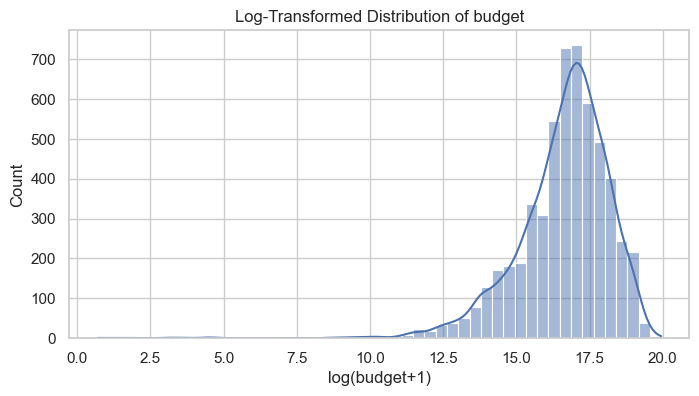

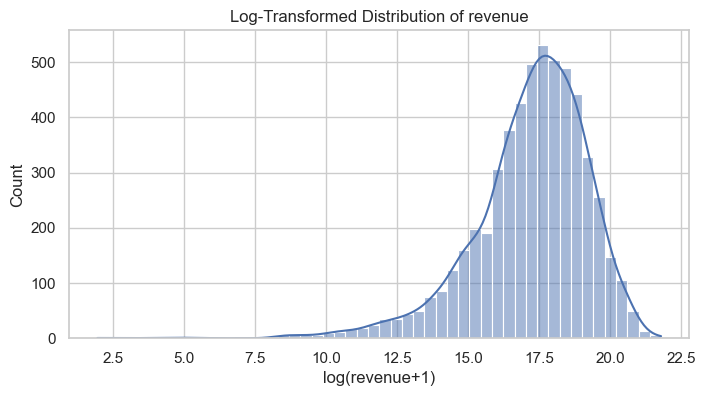

C:\Users\kayd7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


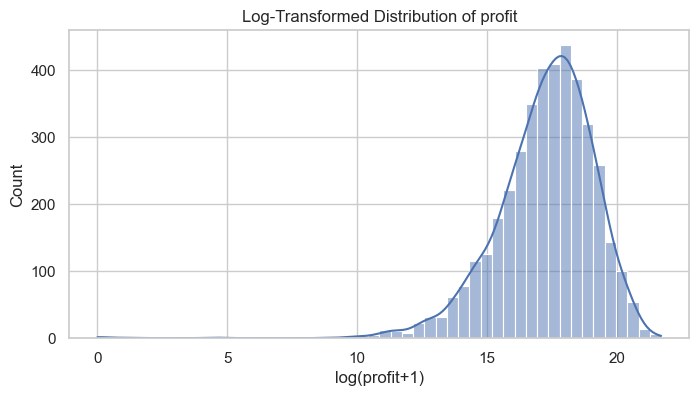

C:\Users\kayd7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kayd7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


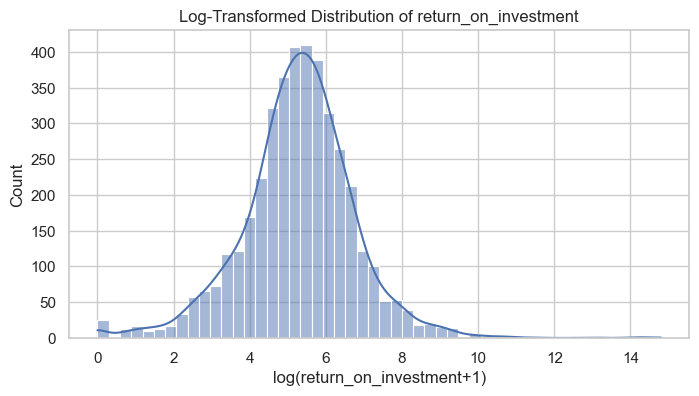

In [2463]:
numeric_cols = ['budget', 'revenue', 'profit', 'return_on_investment']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(np.log1p(movies_cleaned[col]), bins=50, kde=True)
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.xlabel(f'log({col}+1)')
    plt.ylabel('Count')
    plt.show()


C:\Users\kayd7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kayd7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


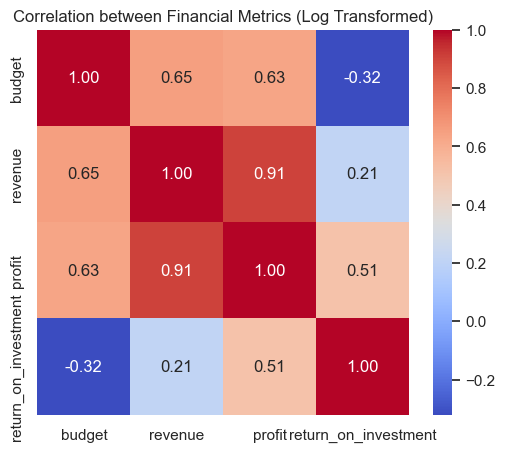

In [2464]:
# Apply log transformation 
movies_log = movies_cleaned[['budget', 'revenue', 'profit', 'return_on_investment']].apply(lambda x: np.log1p(x))

# Correlation matrix
corr_log = movies_log.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Financial Metrics (Log Transformed)')
plt.show()


Top 30 Movies by Revenue

In [2465]:
# Step 1: Sort movies by ROI descending
top_30_revenue = movies_cleaned.sort_values(by='revenue', ascending=False).head(30)

# Step 2: Display relevant columns
top_30_revenue_display = top_30_revenue[['title', 'release_year', 'genre', 'return_on_investment', 'profit', 'revenue', 'budget']]

print(top_30_revenue_display)

                                             title  release_year  \
65                                          Avatar          2009   
97                               Avengers: Endgame          2019   
62                        Avatar: The Way of Water          2022   
123                                        Titanic          1997   
496                   Star Wars: The Force Awakens          2015   
106                         Avengers: Infinity War          2018   
90                         Spider-Man: No Way Home          2021   
249                                 Jurassic World          2015   
171                                  The Lion King          2019   
265                                   The Avengers          2012   
267                                      Furious 7          2015   
64                               Top Gun: Maverick          2022   
358                                      Frozen II          2019   
137                                         Barb

C:\Users\kayd7\AppData\Local\Temp\ipykernel_11416\713579603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


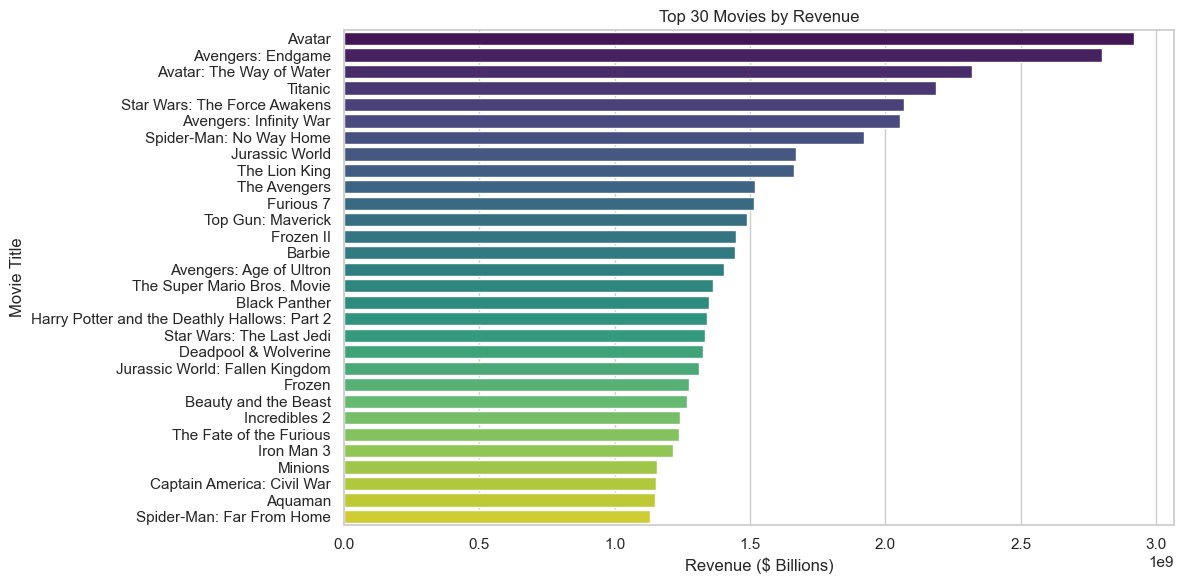

In [2466]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_30_revenue,
    x='revenue',
    y='title',
    palette='viridis'
)
plt.xlabel('Revenue ($ Billions)')
plt.ylabel('Movie Title')
plt.title('Top 30 Movies by Revenue')
plt.tight_layout()
plt.show()

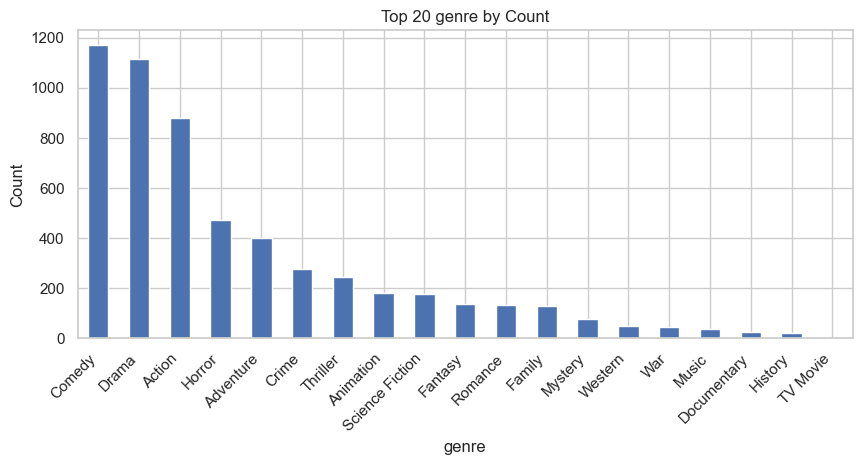

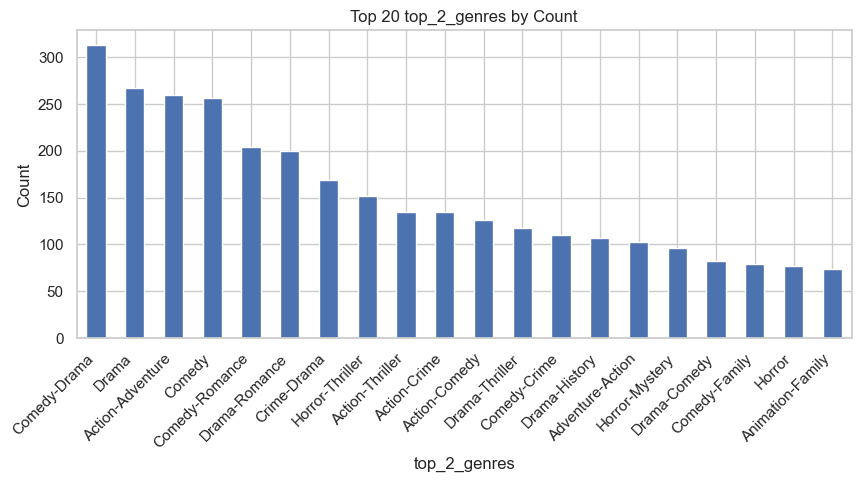

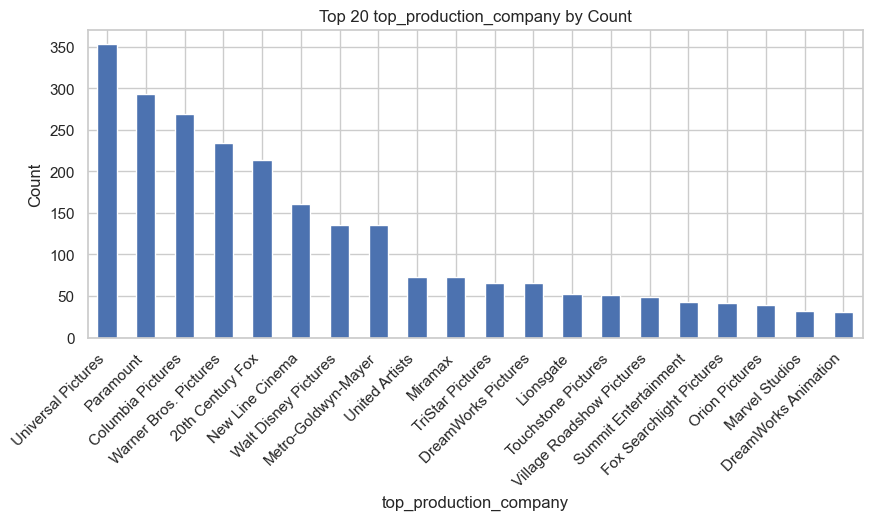

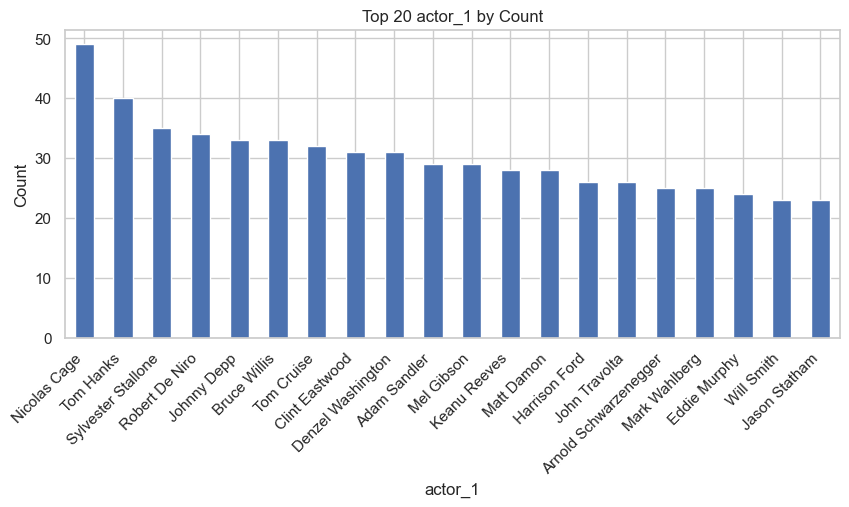

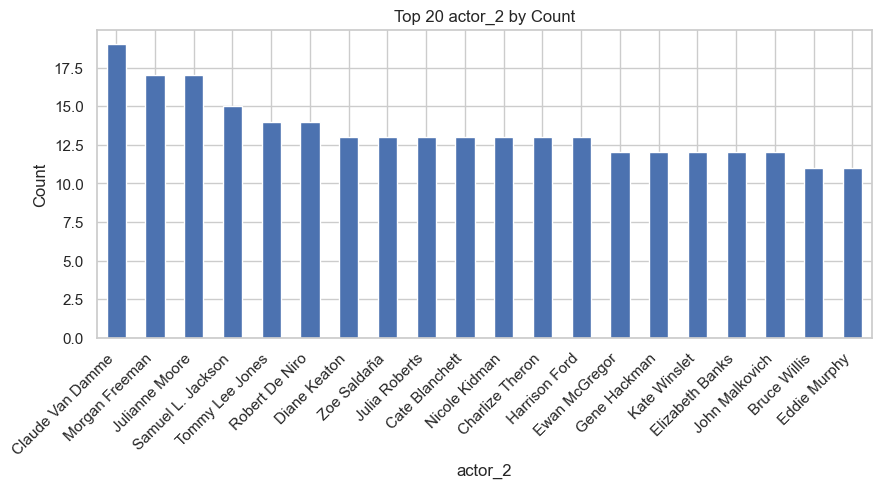

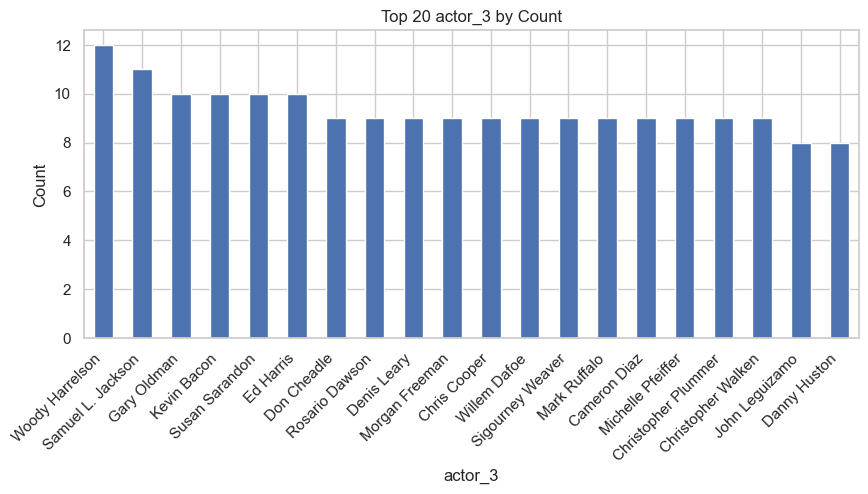

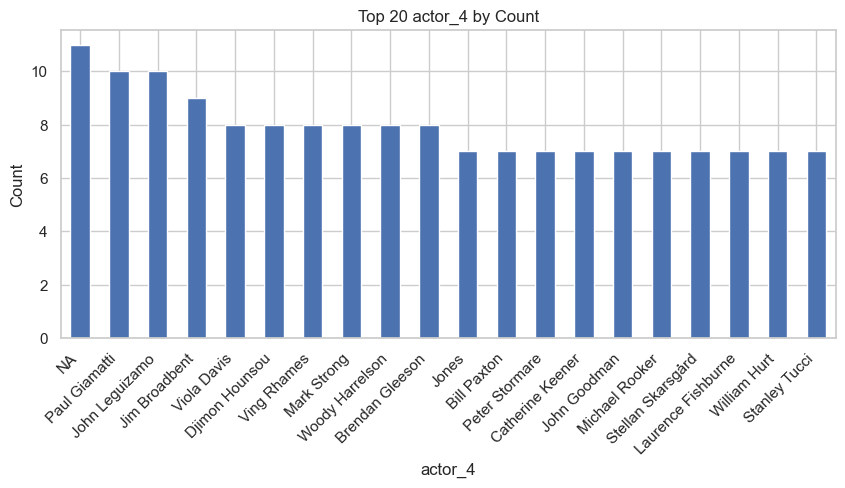

In [2467]:
categorical_cols = ['genre', 'top_2_genres', 'top_production_company', 'actor_1', 'actor_2', 'actor_3', 'actor_4']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    movies_cleaned[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Top 20 {col} by Count')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [2468]:
# Melt actor columns into one long column
actors_long = movies_cleaned.melt(
    id_vars=[],  # no numeric columns needed for count
    value_vars=['actor_1','actor_2','actor_3','actor_4'],
    var_name='actor_position',
    value_name='actor'
)
# Remove 'NA'
actors_long = actors_long[actors_long['actor'] != 'NA']

# Count occurrences of each actor
top_actors_count = actors_long['actor'].value_counts().head(30)
top_actors_count



actor
Robert De Niro        61
Nicolas Cage          58
Bruce Willis          52
Tom Hanks             48
Morgan Freeman        47
Samuel L. Jackson     44
Matt Damon            44
Harrison Ford         41
Tom Cruise            40
Sylvester Stallone    39
Mark Wahlberg         39
Brad Pitt             38
Johnny Depp           38
Eddie Murphy          37
Nicole Kidman         37
Meryl Streep          37
Woody Harrelson       36
Jason Statham         36
Liam Neeson           36
Keanu Reeves          36
Mel Gibson            36
Clint Eastwood        35
Denzel Washington     35
Julia Roberts         34
Jeff Bridges          33
Owen Wilson           32
Kevin Costner         32
Gene Hackman          31
Tommy Lee Jones       31
Ewan McGregor         31
Name: count, dtype: int64

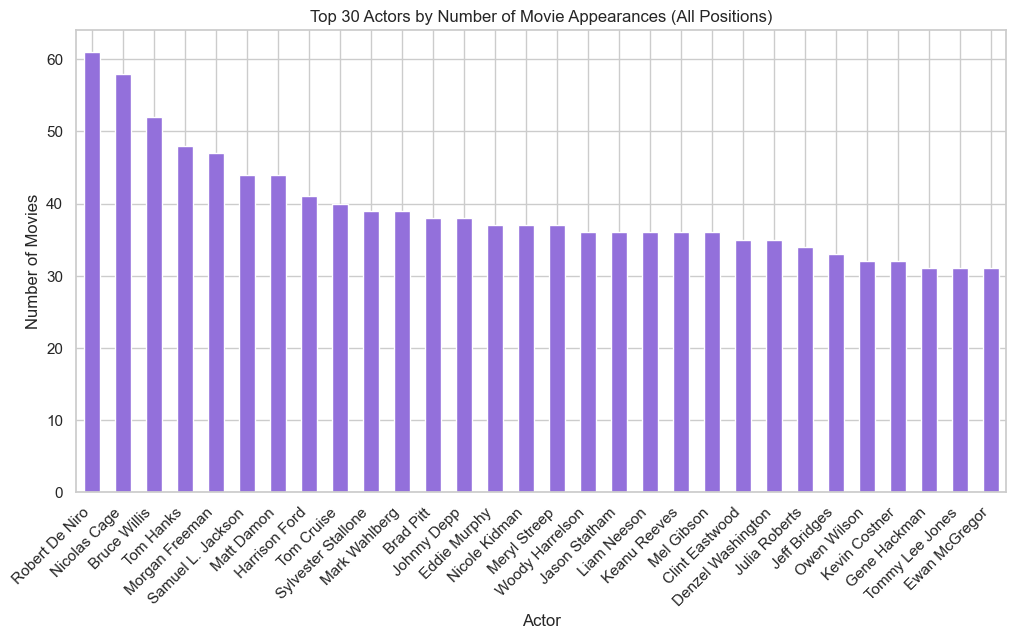

In [2469]:
plt.figure(figsize=(12,6))
top_actors_count.plot(kind='bar', color='mediumpurple')
plt.title('Top 30 Actors by Number of Movie Appearances (All Positions)')
plt.ylabel('Number of Movies')
plt.xlabel('Actor')
plt.xticks(rotation=45, ha='right')
plt.show()


Which actors have done the most movies by each genre?

In [2470]:

# Combine all actor columns into a single 'actor' column
actors_melted = movies_cleaned.melt(
    id_vars=['genre', 'title'],  
    value_vars=['actor_1','actor_2','actor_3','actor_4'],
    value_name='actor'
).dropna(subset=['actor'])

# Remove duplicate actor-genre-movie combinations
actors_genre_movies = actors_melted[['actor','genre','title']].drop_duplicates()

# Count movies per actor per genre
actor_genre_count = actors_genre_movies.groupby(['genre','actor']).size().reset_index(name='movie_count')

# For each genre, get the actor with the highest movie_count
top_actor_per_genre = actor_genre_count.sort_values(['genre','movie_count'], ascending=[True, False]) \
                                      .groupby('genre').head(1)

print(top_actor_per_genre)


                 genre             actor  movie_count
788             Action     Jason Statham           28
2336         Adventure     Harrison Ford           12
3357         Animation    John Leguizamo            7
3651            Comedy      Adam Sandler           21
6765             Crime    Robert De Niro           11
6972       Documentary     Michael Moore            4
8572             Drama        Matt Damon           22
9466            Family       Ben Stiller            3
10092          Fantasy   Jennifer Garner            4
10395          History      Jason Clarke            2
11092           Horror  Jamie Lee Curtis            9
12015            Music   Adolfo Quinones            1
12180          Mystery    Annette Bening            2
12517          Romance      Cameron Diaz            5
13058  Science Fiction   DeForest Kelley            5
13535         TV Movie   Daphne Ashbrook            1
13646         Thriller      Bruce Willis            6
14297              War      

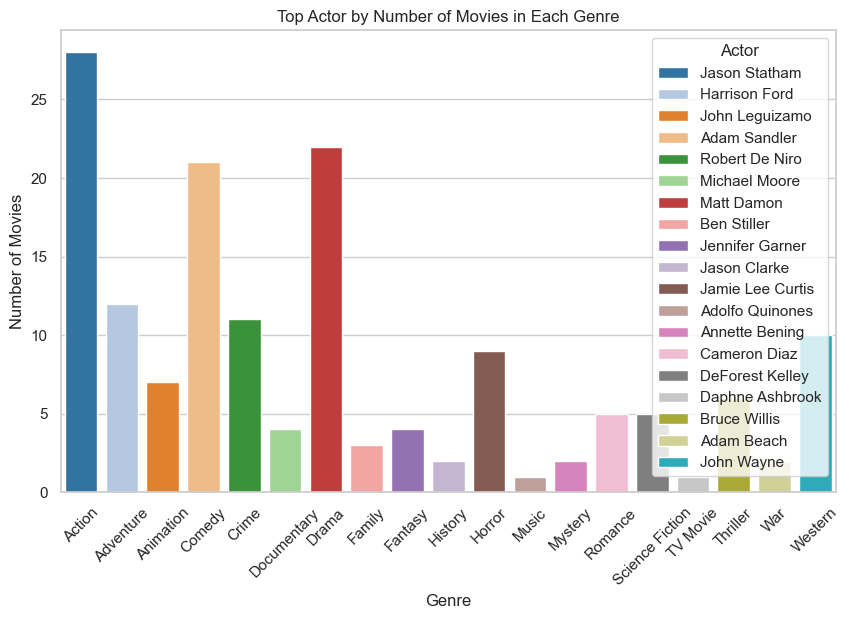

In [2471]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_actor_per_genre, 
    x='genre', 
    y='movie_count', 
    hue='actor', 
    dodge=False, 
    palette='tab20'
)
plt.xticks(rotation=45)
plt.title('Top Actor by Number of Movies in Each Genre')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.legend(title='Actor')
plt.show()


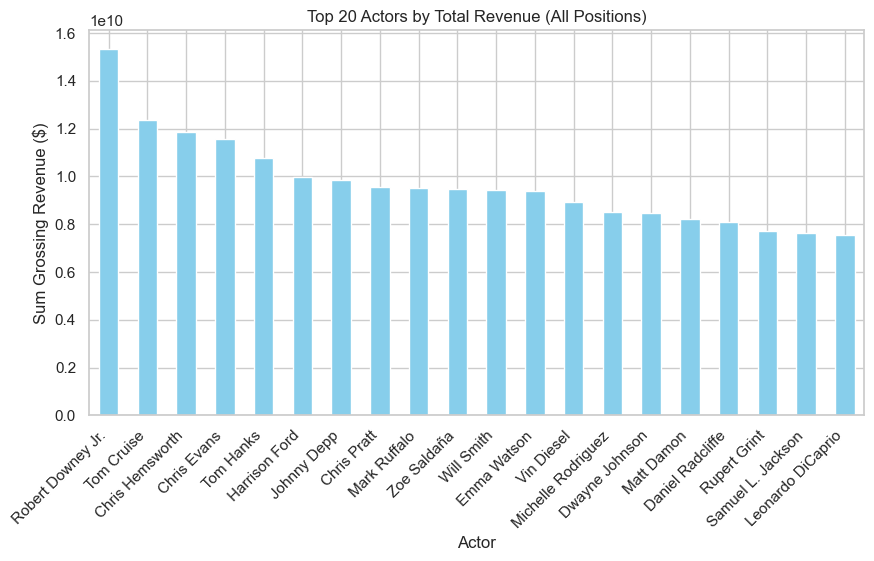

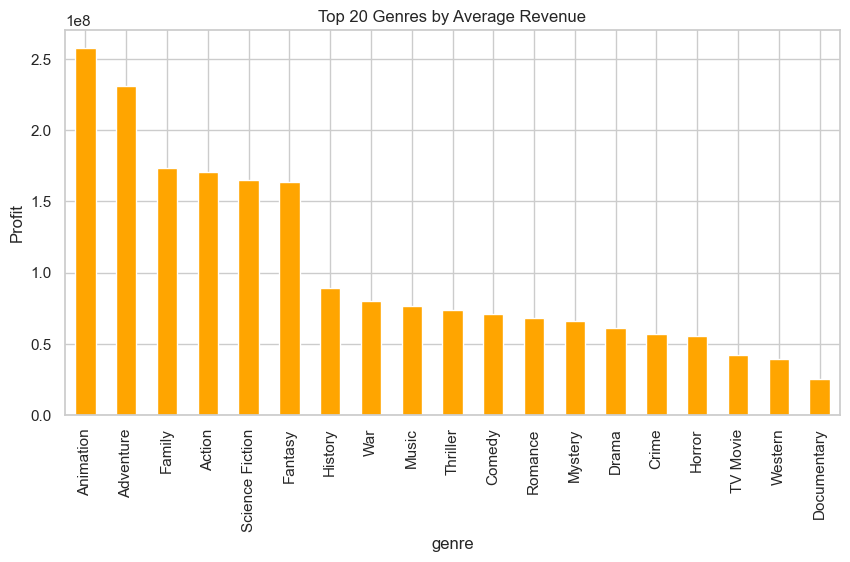

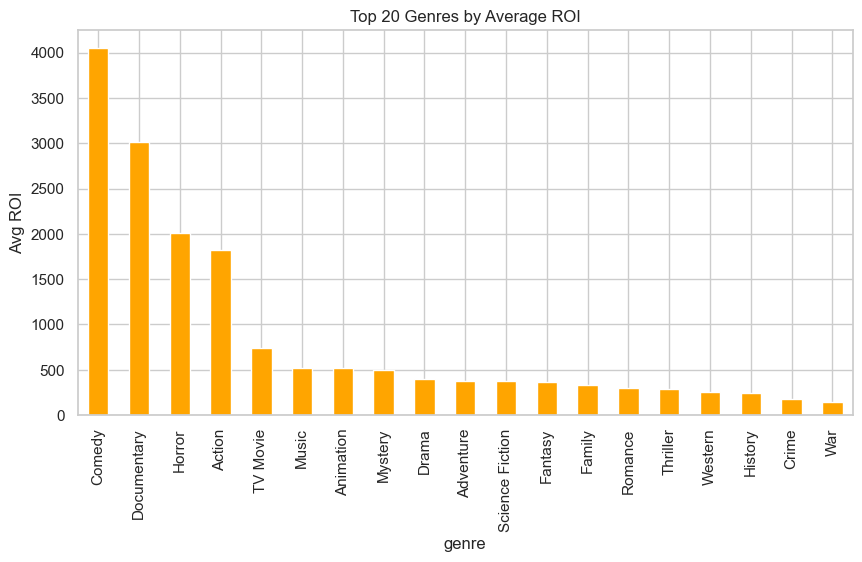

In [2472]:
# Melt actor columns into one
actors_long = movies_cleaned.melt(
    id_vars=['revenue', 'profit', 'return_on_investment'], 
    value_vars=['actor_1','actor_2','actor_3','actor_4'],
    var_name='actor_position',
    value_name='actor'
)
# Remove 'NA' actors if needed
actors_long = actors_long[actors_long['actor'] != 'NA']

top_actors_revenue = actors_long.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,5))
top_actors_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 20 Actors by Total Revenue (All Positions)')
plt.ylabel('Sum Grossing Revenue ($)')
plt.xlabel('Actor')
plt.xticks(rotation=45, ha='right')
plt.show()

# Top genres by average revenue
top_genres_profit = movies_cleaned.groupby('genre')['revenue'].mean().sort_values(ascending=False).head(20)
top_genres_profit.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 20 Genres by Average Revenue')
plt.ylabel('Profit')
plt.show()

# Top genres by average ROI
top_genres_profit = movies_cleaned.groupby('genre')['return_on_investment'].mean().sort_values(ascending=False).head(20)
top_genres_profit.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 20 Genres by Average ROI')
plt.ylabel('Avg ROI')
plt.show()

In [2473]:
'''# Movies over years
plt.figure(figsize=(12,5))
movies_cleaned.groupby('release_year').size().plot()
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Total Revenue over years
plt.figure(figsize=(12,5))
movies_cleaned.groupby('release_year')['revenue'].sum().plot()
plt.title('Total Revenue by Release Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($ Billions)')
plt.show()

# Total Budget over years
plt.figure(figsize=(12,5))
movies_cleaned.groupby('release_year')['budget'].sum().plot()
plt.title('Total Budget by Release Year')
plt.xlabel('Year')
plt.ylabel('Total Budget ($)')
plt.show()


'''


"# Movies over years\nplt.figure(figsize=(12,5))\nmovies_cleaned.groupby('release_year').size().plot()\nplt.title('Number of Movies Released per Year')\nplt.xlabel('Year')\nplt.ylabel('Count')\nplt.show()\n\n# Total Revenue over years\nplt.figure(figsize=(12,5))\nmovies_cleaned.groupby('release_year')['revenue'].sum().plot()\nplt.title('Total Revenue by Release Year')\nplt.xlabel('Year')\nplt.ylabel('Total Revenue ($ Billions)')\nplt.show()\n\n# Total Budget over years\nplt.figure(figsize=(12,5))\nmovies_cleaned.groupby('release_year')['budget'].sum().plot()\nplt.title('Total Budget by Release Year')\nplt.xlabel('Year')\nplt.ylabel('Total Budget ($)')\nplt.show()\n\n\n"

In [2474]:
# Count number of movies per genre per month
genre_month_counts = (
    movies_cleaned
    .groupby(['release_month', 'genre'])
    .size()
    .reset_index(name='movie_count')
)


# For each month, select the genre with the highest count
top_genre_per_month = (
    genre_month_counts.loc[
        genre_month_counts.groupby('release_month')['movie_count'].idxmax()
    ]
    .sort_values('release_month')
    .reset_index(drop=True)
)

top_genre_per_month


import calendar

# Map month numbers to names
top_genre_per_month['month_name'] = top_genre_per_month['release_month'].apply(lambda x: calendar.month_name[int(x)])
top_genre_per_month = top_genre_per_month[['month_name', 'genre', 'movie_count']]
top_genre_per_month



,month_name,genre,movie_count
0,January,Comedy,60
1,February,Comedy,90
2,March,Comedy,98
3,April,Comedy,95
4,May,Comedy,75
5,June,Comedy,114
6,July,Comedy,110
7,August,Comedy,107
8,September,Drama,182
9,October,Drama,129


In [2475]:
# Group by month and genre, averaging revenue
genre_month_avg_return_on_investment = (
    movies_cleaned
    .groupby(['release_month', 'genre'])['return_on_investment']
    .mean()
    .reset_index()
)
# Get the genre with highest average revenue for each month
top_avg_return_on_investment_genre_per_month = (
    genre_month_avg_return_on_investment.loc[
        genre_month_avg_return_on_investment.groupby('release_month')['return_on_investment'].idxmax()
    ]
    .sort_values('release_month')
    .reset_index(drop=True)
)
import calendar

# Add month names
top_avg_return_on_investment_genre_per_month['month_name'] = top_avg_return_on_investment_genre_per_month['release_month'].apply(lambda x: calendar.month_name[int(x)])

# Reorder columns
top_avg_return_on_investment_genre_per_month = top_avg_return_on_investment_genre_per_month[['month_name', 'genre', 'return_on_investment']]
top_avg_return_on_investment_genre_per_month.rename(columns={'return_on_investment': 'avg_return_on_investment'}, inplace=True)
top_avg_return_on_investment_genre_per_month


,month_name,genre,avg_return_on_investment
0,January,Comedy,45099.283333
1,February,Animation,3842.272727
2,March,Documentary,2071.333333
3,April,Animation,673.142857
4,May,Documentary,2348.500000
5,June,Documentary,1890.000000
6,July,Horror,16206.258065
7,August,Thriller,677.695652
8,September,Comedy,17391.362637
9,October,Horror,1769.205128


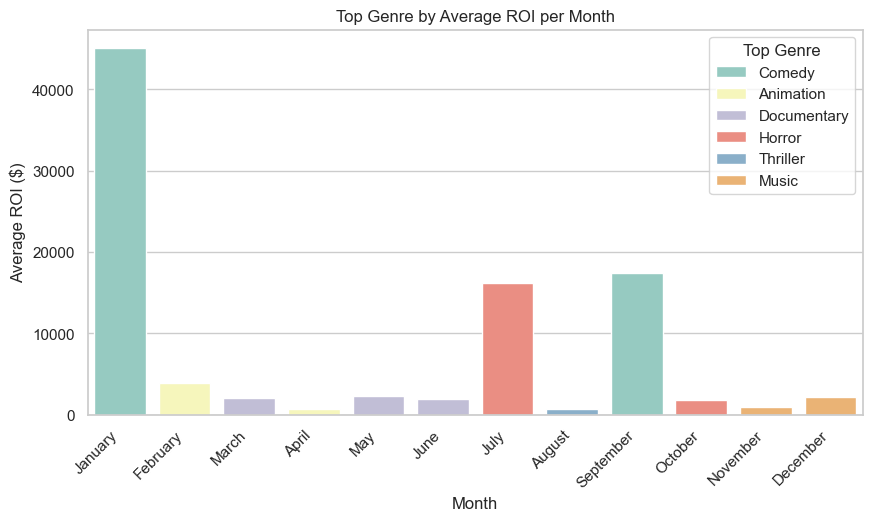

In [2476]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_avg_return_on_investment_genre_per_month,
    x='month_name',
    y='avg_return_on_investment',
    hue='genre',
    dodge=False,
    palette='Set3'
)
plt.title('Top Genre by Average ROI per Month')
plt.xlabel('Month')
plt.ylabel('Average ROI ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top Genre')
plt.show()


In [2477]:
# Group by month and genre, total revenue
genre_month_total_revenue = (
    movies_cleaned
    .groupby(['release_month', 'genre'])['revenue']
    .mean()
    .reset_index()
)
# Get the genre with highest total revenue for each month
top_total_revenue_genre_per_month = (
    genre_month_total_revenue.loc[
        genre_month_total_revenue.groupby('release_month')['revenue'].idxmax()
    ]
    .sort_values('release_month')
    .reset_index(drop=True)
)
import calendar

# Add month names
top_total_revenue_genre_per_month['month_name'] = top_total_revenue_genre_per_month['release_month'].apply(lambda x: calendar.month_name[int(x)])

# Reorder columns
top_total_revenue_genre_per_month = top_total_revenue_genre_per_month[['month_name', 'genre', 'revenue']]
top_total_revenue_genre_per_month.rename(columns={'revenue': 'total_revenue'}, inplace=True)
top_total_revenue_genre_per_month

,month_name,genre,total_revenue
0,January,Animation,1.723630e+08
1,February,Animation,2.567606e+08
2,March,Family,3.083369e+08
3,April,Adventure,3.715215e+08
4,May,Adventure,4.006551e+08
5,June,Animation,4.447436e+08
6,July,Fantasy,3.209031e+08
7,August,Mystery,1.515937e+08
8,September,Animation,2.073861e+08
9,October,Music,5.860000e+08


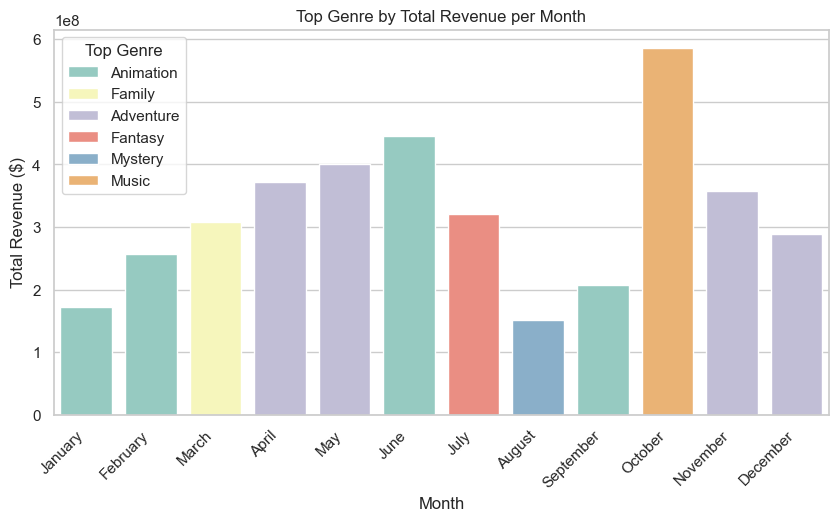

In [2478]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_total_revenue_genre_per_month,
    x='month_name',
    y='total_revenue',
    hue='genre',
    dodge=False,
    palette='Set3'
)
plt.title('Top Genre by Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top Genre')
plt.show()

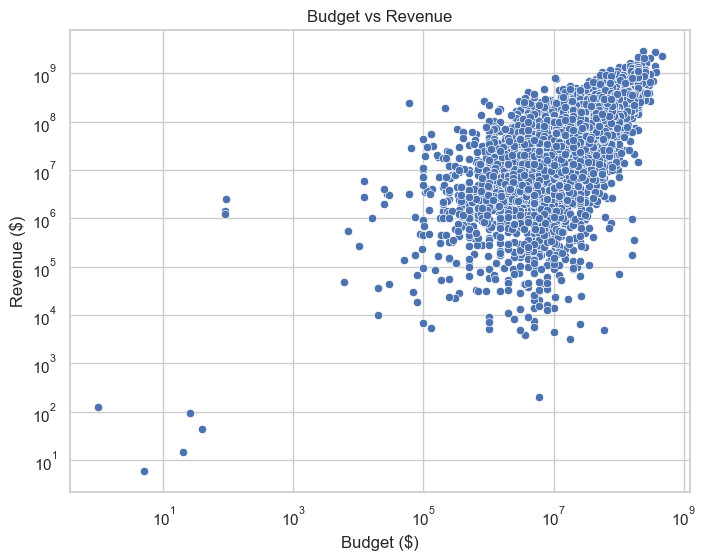

In [2479]:
#Budget vs Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=movies_cleaned)
plt.title('Budget vs Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.yscale('log')  
plt.xscale('log')
plt.show()


In [2480]:
'''#Release Year vs Revenue
plt.figure(figsize=(10,5))
sns.scatterplot(x='release_year', y='revenue', data=movies_cleaned)
plt.title('Revenue over Years')
plt.xlabel('Release Year')
plt.ylabel('Revenue ($)')
plt.yscale('log')
plt.show()
'''

"#Release Year vs Revenue\nplt.figure(figsize=(10,5))\nsns.scatterplot(x='release_year', y='revenue', data=movies_cleaned)\nplt.title('Revenue over Years')\nplt.xlabel('Release Year')\nplt.ylabel('Revenue ($)')\nplt.yscale('log')\nplt.show()\n"

In [2481]:
'''#Release Year vs ROI
plt.figure(figsize=(10,5))
sns.scatterplot(x='release_year', y='return_on_investment', data=movies_cleaned)
plt.title('ROI over Years')
plt.xlabel('Release Year')
plt.ylabel('ROI ($)')
plt.yscale('log')
plt.show()
'''

"#Release Year vs ROI\nplt.figure(figsize=(10,5))\nsns.scatterplot(x='release_year', y='return_on_investment', data=movies_cleaned)\nplt.title('ROI over Years')\nplt.xlabel('Release Year')\nplt.ylabel('ROI ($)')\nplt.yscale('log')\nplt.show()\n"

In [2482]:
'''#Release Year vs ROI
plt.figure(figsize=(10,5))
sns.scatterplot(x='release_year', y='budget', data=movies_cleaned)
plt.title('Budget over Years')
plt.xlabel('Release Year')
plt.ylabel('Budget ($)')
plt.yscale('log')
plt.show()
'''

"#Release Year vs ROI\nplt.figure(figsize=(10,5))\nsns.scatterplot(x='release_year', y='budget', data=movies_cleaned)\nplt.title('Budget over Years')\nplt.xlabel('Release Year')\nplt.ylabel('Budget ($)')\nplt.yscale('log')\nplt.show()\n"

In [2483]:
# Step 1: Sort movies by ROI descending
top_30_budget = movies_cleaned.sort_values(by='budget', ascending=False).head(30)

# Step 2: Display relevant columns
top_30_budget_display = top_30_budget[['title', 'release_year', 'genre', 'return_on_investment', 'profit', 'revenue', 'budget']]

print(top_30_budget_display)

                                              title  release_year  \
62                         Avatar: The Way of Water          2022   
205     Pirates of the Caribbean: On Stranger Tides          2011   
155                         Avengers: Age of Ultron          2015   
97                                Avengers: Endgame          2019   
33                                           Fast X          2023   
106                          Avengers: Infinity War          2018   
437                                  Justice League          2017   
237        Pirates of the Caribbean: At World's End          2007   
69                                        The Flash          2023   
282                              The Little Mermaid          2023   
170           Indiana Jones and the Dial of Destiny          2023   
127   Mission: Impossible - Dead Reckoning Part One          2023   
1722                               Superman Returns          2006   
171                               

C:\Users\kayd7\AppData\Local\Temp\ipykernel_11416\915179535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


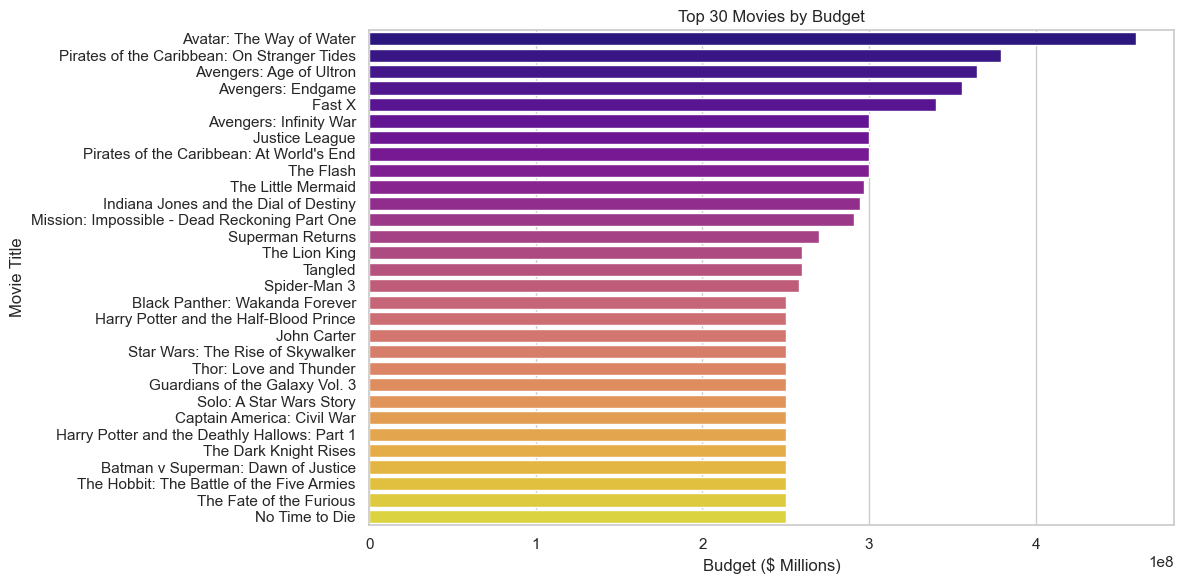

In [2484]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_30_budget,
    x='budget',
    y='title',
    palette='plasma'
)
plt.xlabel('Budget ($ Millions)')
plt.ylabel('Movie Title')
plt.title('Top 30 Movies by Budget')
plt.tight_layout()
plt.show()

In [2485]:
# Step 1: Sort movies by ROI descending
top_30_profit = movies_cleaned.sort_values(by='profit', ascending=False).head(30)

# Step 2: Display relevant columns
top_30_profit_display = top_30_profit[['title', 'release_year', 'genre', 'return_on_investment', 'profit', 'revenue', 'budget']]

print(top_30_profit_display)

                                              title  release_year  \
65                                           Avatar          2009   
97                                Avengers: Endgame          2019   
123                                         Titanic          1997   
62                         Avatar: The Way of Water          2022   
496                    Star Wars: The Force Awakens          2015   
106                          Avengers: Infinity War          2018   
90                          Spider-Man: No Way Home          2021   
249                                  Jurassic World          2015   
171                                   The Lion King          2019   
267                                       Furious 7          2015   
64                                Top Gun: Maverick          2022   
137                                          Barbie          2023   
358                                       Frozen II          2019   
265                               

C:\Users\kayd7\AppData\Local\Temp\ipykernel_11416\382851720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


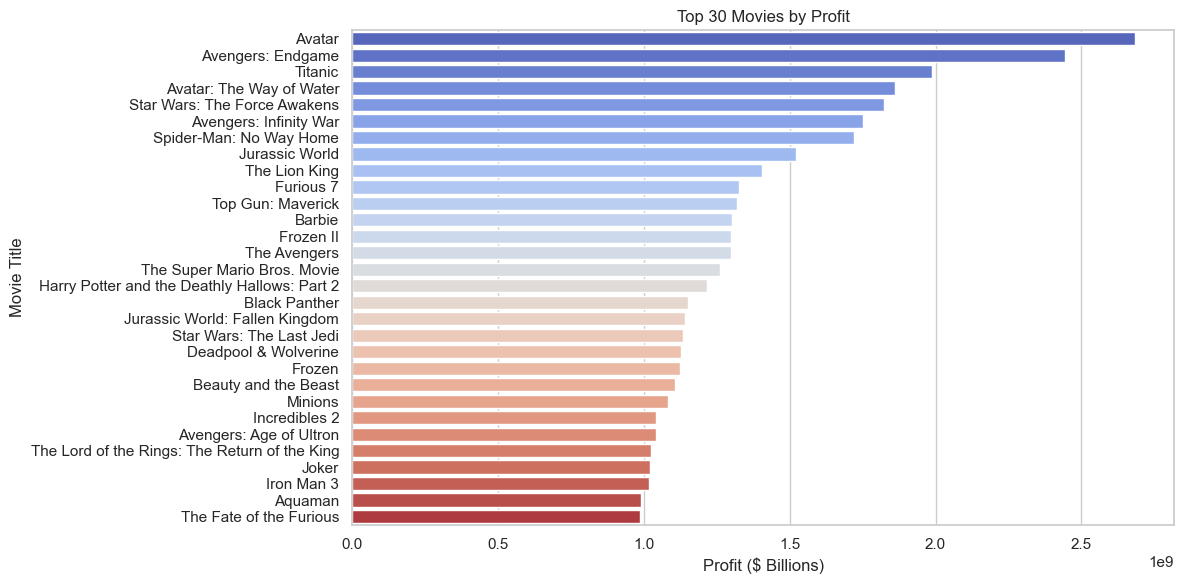

In [2486]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_30_profit,
    x='profit',
    y='title',
    palette='coolwarm'
)
plt.xlabel('Profit ($ Billions)')
plt.ylabel('Movie Title')
plt.title('Top 30 Movies by Profit')
plt.tight_layout()
plt.show()

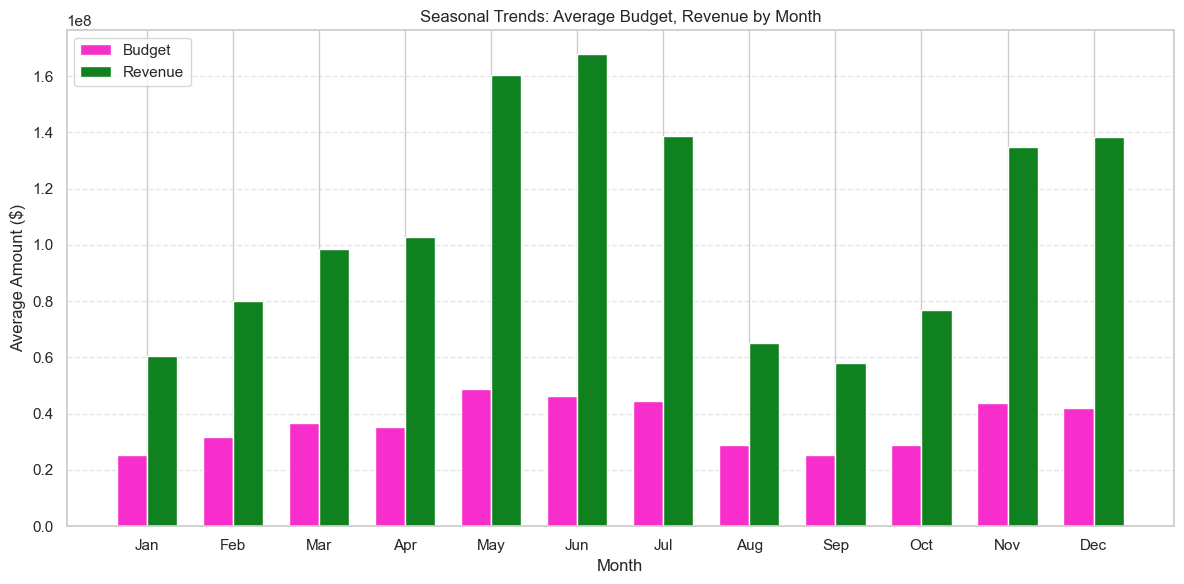

In [2487]:
# Aggregate by month
monthly_trends = movies_cleaned.groupby('release_month').agg({
    'budget': 'mean',
    'revenue': 'mean',
    }).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

width = 0.35
months = monthly_trends['release_month']

# Bars for Budget and Revenue
ax1.bar(months - width/2, monthly_trends['budget'], width=width, color="#f72ecc", label='Budget')
ax1.bar(months + width/2, monthly_trends['revenue'], width=width, color="#10811f", label='Revenue')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Amount ($)')
ax1.set_xticks(months)
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.set_title('Seasonal Trends: Average Budget, Revenue by Month')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Legends
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()







C:\Users\kayd7\AppData\Local\Temp\ipykernel_11416\576982103.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(company_financials_recent.index, rotation=45, ha='right')


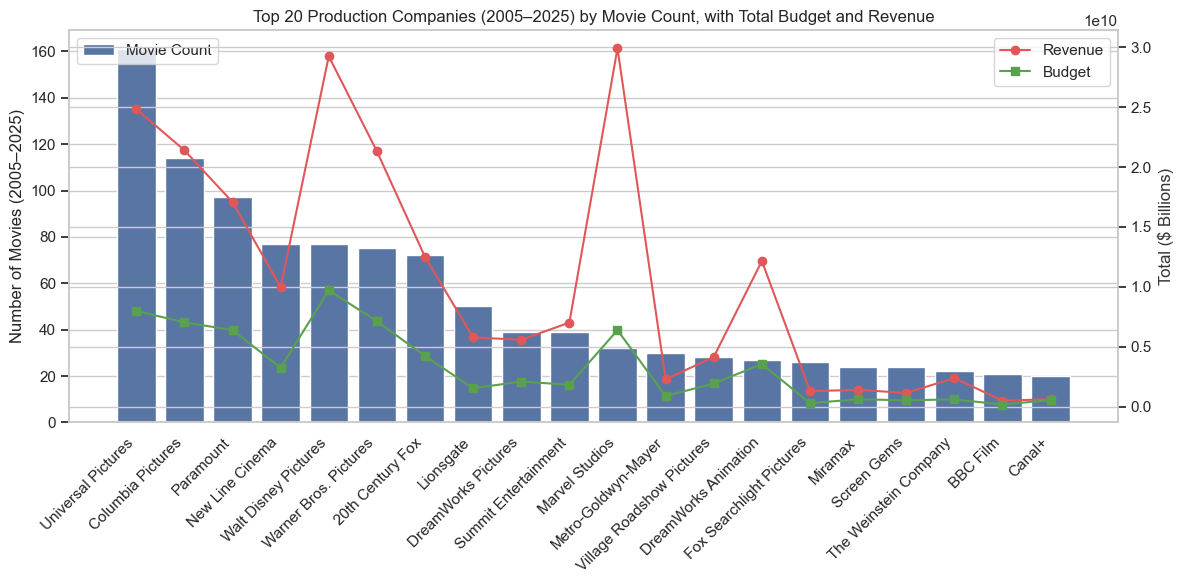

In [2488]:
# --- Filter to last 20 years ---
recent_movies = movies_cleaned[movies_cleaned['release_year'] >= 2005]

# --- Get top 20 companies by movie count in this period ---
top_companies_recent = (
    recent_movies['top_production_company']
    .value_counts()
    .head(20)
    .index
)

# --- Aggregate financials for those companies ---
company_financials_recent = (
    recent_movies[recent_movies['top_production_company'].isin(top_companies_recent)]
    .groupby('top_production_company')
    .agg({
        'budget': 'sum',
        'revenue': 'sum',
        'title': 'count'   # assuming a 'title' column exists
    })
    .rename(columns={'title': 'movie_count'})
    .sort_values('movie_count', ascending=False)
)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Movie count bars
sns.barplot(
    x=company_financials_recent.index,
    y=company_financials_recent['movie_count'],
    color='#4C72B0',
    label='Movie Count',
    ax=ax1
)
ax1.set_ylabel('Number of Movies (2005–2025)')
ax1.set_xlabel('')
ax1.set_xticklabels(company_financials_recent.index, rotation=45, ha='right')

# Secondary axis for financials
ax2 = ax1.twinx()
ax2.plot(company_financials_recent.index, company_financials_recent['revenue'], color='#E15759', marker='o', label='Revenue')
ax2.plot(company_financials_recent.index, company_financials_recent['budget'], color='#59A14F', marker='s', label='Budget')
ax2.set_ylabel('Total ($ Billions)', color='#333')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Top 20 Production Companies (2005–2025) by Movie Count, with Total Budget and Revenue')
plt.tight_layout()
plt.show()



<Figure size 1400x700 with 0 Axes>

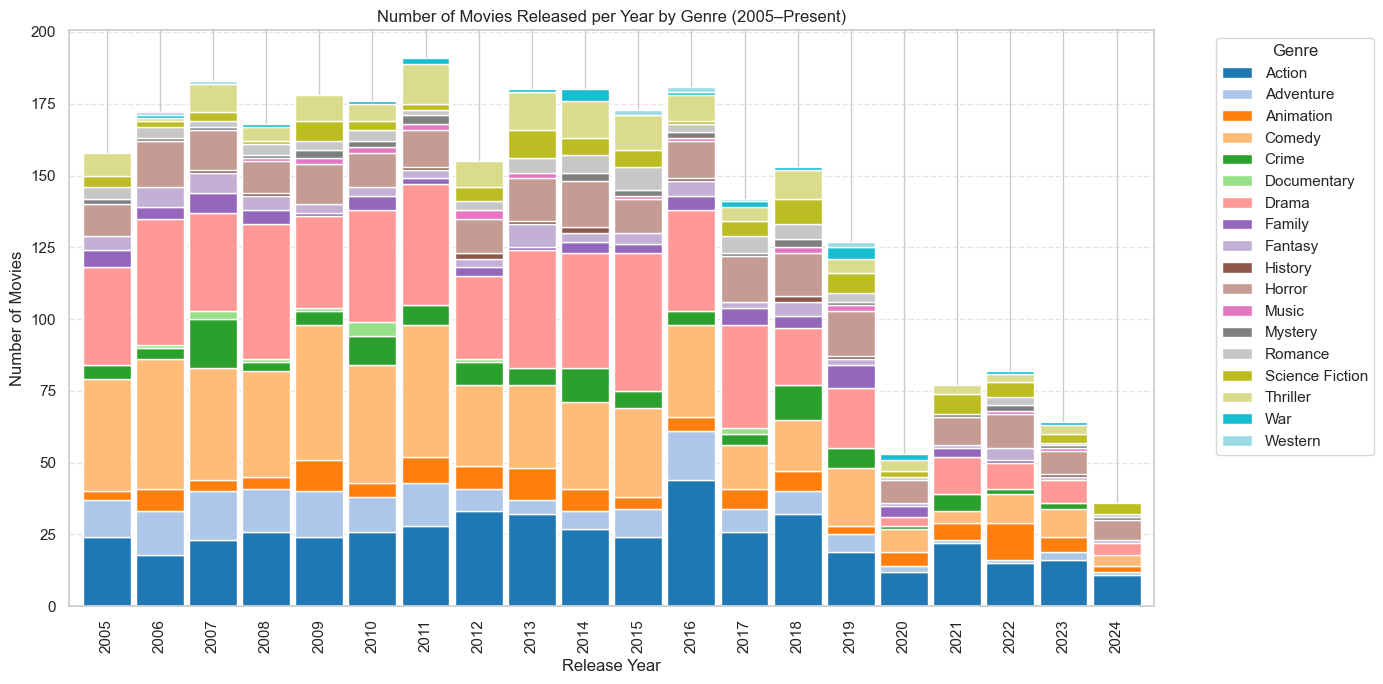

In [2489]:
# --- Filter data from 1980 onward ---
movies_recent = movies_cleaned[movies_cleaned['release_year'] >= 2005]

# --- Get top 10 most frequent genres to simplify chart ---
top_genres = movies_recent['genre'].value_counts().head(20).index
movies_recent = movies_recent[movies_recent['genre'].isin(top_genres)]

# --- Aggregate movies per year per genre ---
genre_year = (
    movies_recent.groupby(['release_year', 'genre'])
    .size()
    .reset_index(name='movie_count')
)

# --- Pivot for stacked bar chart ---
genre_year_pivot = genre_year.pivot(index='release_year', columns='genre', values='movie_count').fillna(0)

# --- Plot ---
plt.figure(figsize=(14,7))
genre_year_pivot.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(14,7),
    width=0.9
)

plt.title('Number of Movies Released per Year by Genre (2005–Present)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



C:\Users\kayd7\AppData\Local\Temp\ipykernel_11416\1778797370.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_movies_revenue['title'], rotation=45, ha='right')


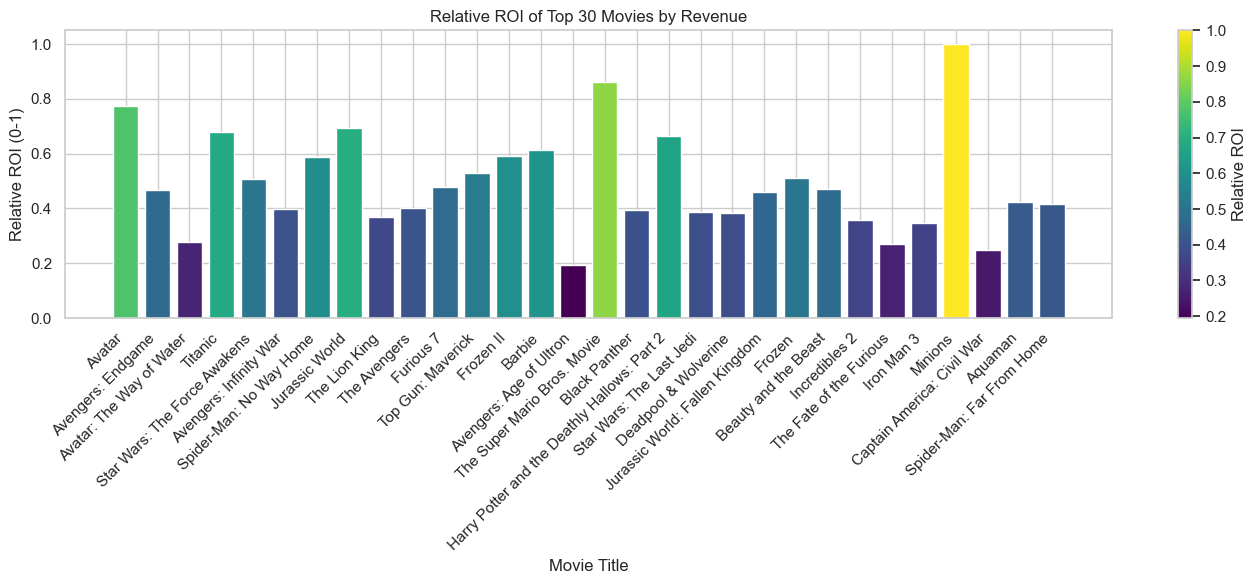

In [ ]:

# Top 30 movies by revenue
top_movies_revenue = movies_cleaned.sort_values('revenue', ascending=False).head(30).copy()

# Calculate relative ROI
top_movies_revenue['relative_roi'] = top_movies_revenue['return_on_investment'] / top_movies_revenue['return_on_investment'].max()

# Normalize relative ROI for coloring
norm = plt.Normalize(top_movies_revenue['relative_roi'].min(), top_movies_revenue['relative_roi'].max())
colors = cm.viridis(norm(top_movies_revenue['relative_roi']))

# Create plot and axes
fig, ax = plt.subplots(figsize=(14,6))
bars = ax.bar(top_movies_revenue['title'], top_movies_revenue['relative_roi'], color=colors)
ax.set_title('Relative ROI of Top 30 Movies by Revenue')
ax.set_ylabel('Relative ROI (0-1)')
ax.set_xlabel('Movie Title')
ax.set_xticklabels(top_movies_revenue['title'], rotation=45, ha='right')

# Add colorbar
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Relative ROI')

plt.tight_layout()
plt.show()


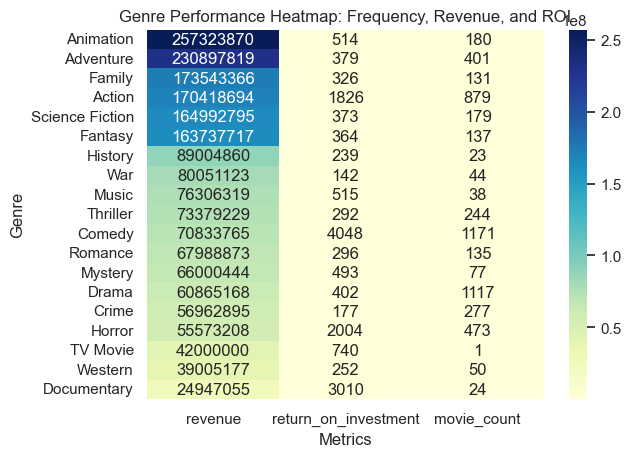

In [2491]:
genre_metrics = (
    movies_cleaned.groupby('genre')[['revenue','return_on_investment']]
    .mean()
    .merge(movies_cleaned['genre'].value_counts(), left_index=True, right_index=True)
    .rename(columns={'count': 'movie_count'})
)

sns.heatmap(genre_metrics.sort_values('revenue', ascending=False),
            cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Genre Performance Heatmap: Frequency, Revenue, and ROI')
plt.xlabel('Metrics')
plt.ylabel('Genre')
plt.show()


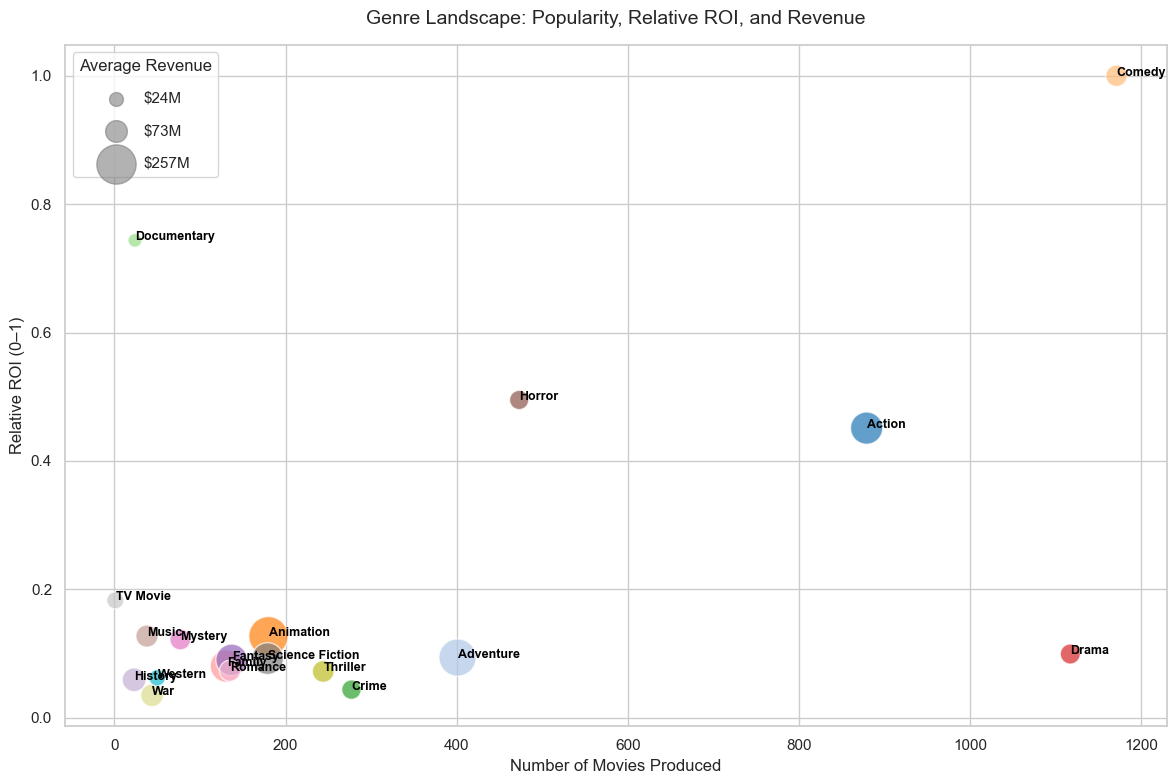

In [2492]:
# --- Aggregate metrics ---
genre_metrics = (
    movies_cleaned.groupby('genre')[['budget', 'revenue', 'return_on_investment']]
    .agg({'budget':'mean', 'revenue':'mean', 'return_on_investment':'mean'})
    .merge(
        movies_cleaned['genre'].value_counts().rename('movie_count'),
        left_index=True, right_index=True
    )
    .reset_index()
)

# --- Calculate relative ROI ---
genre_metrics['relative_roi'] = genre_metrics['return_on_investment'] / genre_metrics['return_on_investment'].max()

# --- Plot setup ---
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")

# Scatter plot (bubble chart)
scatter = sns.scatterplot(
    data=genre_metrics,
    x='movie_count',
    y='relative_roi',
    size='revenue',
    hue='genre',
    alpha=0.7,
    palette='tab20',
    sizes=(100,800),
    legend=False  # we'll add size legend separately
)

# Add genre labels directly
for i, row in genre_metrics.iterrows():
    plt.text(
        row['movie_count'] + 0.3,
        row['relative_roi'],
        row['genre'],
        fontsize=9,
        weight='bold',
        color='black'
    )

# Create a separate legend for bubble sizes (Revenue)
from matplotlib.lines import Line2D
import numpy as np

# Choose a few representative bubble sizes
size_legend = [genre_metrics['revenue'].min(),
               genre_metrics['revenue'].median(),
               genre_metrics['revenue'].max()]

# Map these sizes to marker sizes
marker_sizes = [100 + 700*(val-genre_metrics['revenue'].min())/(genre_metrics['revenue'].max()-genre_metrics['revenue'].min()) for val in size_legend]

# Create custom legend
handles = [plt.scatter([], [], s=s, color='gray', alpha=0.6) for s in marker_sizes]
labels = [f"${int(val/1e6)}M" for val in size_legend]
plt.legend(handles, labels, title="Average Revenue", labelspacing=1.2, loc='upper left', frameon=True)

# Titles and labels
plt.title('Genre Landscape: Popularity, Relative ROI, and Revenue', fontsize=14, pad=15)
plt.xlabel('Number of Movies Produced')
plt.ylabel('Relative ROI (0–1)')
plt.tight_layout()
plt.show()


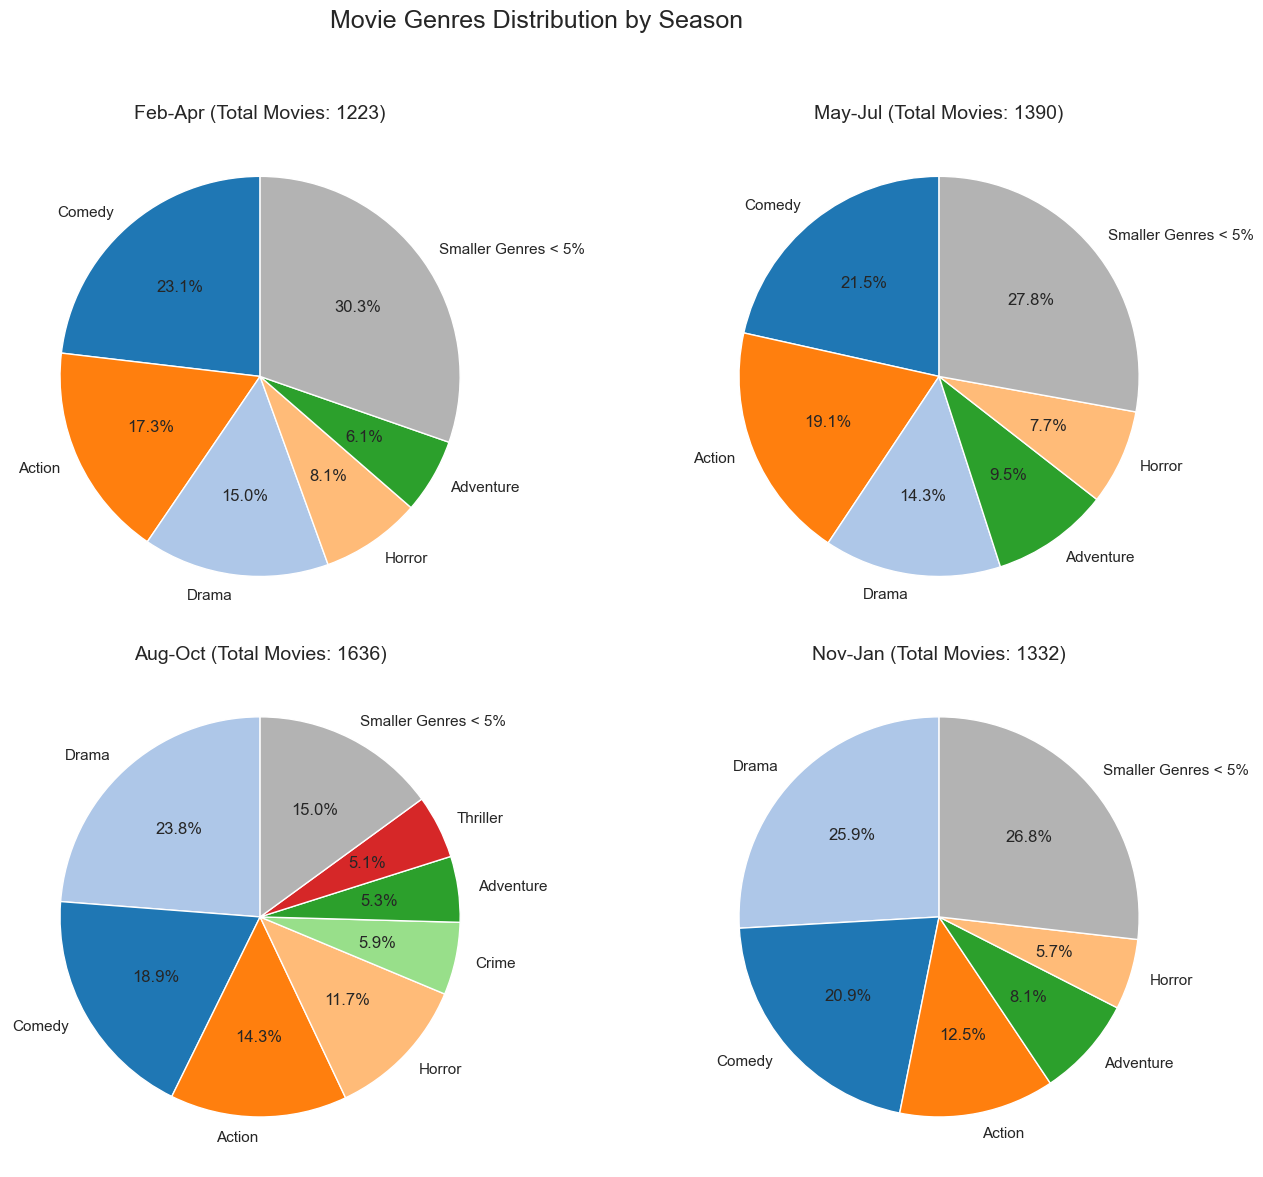

In [2493]:
# Ensure release_date is datetime
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Define seasons
seasons = {
    'Feb-Apr': [2,3,4],
    'May-Jul': [5,6,7],
    'Aug-Oct': [8,9,10],
    'Nov-Jan': [11,12,1]
}

# Create a consistent color palette for all genres
all_genres = movies_cleaned['genre'].value_counts().index.tolist()
palette = sns.color_palette("tab20", n_colors=len(all_genres))
genre_colors = {genre: palette[i] for i, genre in enumerate(all_genres)}
genre_colors['Smaller Genres < 5%'] = (0.7, 0.7, 0.7)  # Gray for small genres

# Prepare subplots
fig, axs = plt.subplots(2,2, figsize=(14,12))
axs = axs.flatten()

# Generate pie charts for each season
for i, (season_name, months) in enumerate(seasons.items()):
    season_movies = movies_cleaned[movies_cleaned['release_month'].isin(months)]
    genre_counts = season_movies['genre'].value_counts()
    total_movies = genre_counts.sum()
    
    # Separate genres < 5% into "Smaller Genres < 5%"
    small_genres = genre_counts[genre_counts / total_movies < 0.05]
    large_genres = genre_counts[genre_counts / total_movies >= 0.05]
    
    # Combine
    final_counts = large_genres.copy()
    if not small_genres.empty:
        final_counts['Smaller Genres < 5%'] = small_genres.sum()
    
    # Assign colors
    colors = [genre_colors[genre] for genre in final_counts.index]
    
    # Plot pie chart with total movies in the title
    axs[i].pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'{season_name} (Total Movies: {total_movies})', fontsize=14)

# Add a main title centered between the two columns
fig.suptitle('Movie Genres Distribution by Season', fontsize=18, x=0.44)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for main title
plt.show()








=== Movie Genre Distribution by Season (in %) ===
genre             Comedy  Action  Drama  Horror  Adventure  \
Spring (Feb-Apr)   23.14   17.33  15.04    8.09       6.05   
Summer (May-Jul)   21.51   19.14  14.32    7.70       9.50   
Fall (Aug-Oct)     18.95   14.30  23.78   11.67       5.32   
Winter (Nov-Jan)   20.95   12.54  25.90    5.71       8.11   

genre             Smaller Genres < 5%  Crime  Thriller  
Spring (Feb-Apr)                30.34   0.00      0.00  
Summer (May-Jul)                27.84   0.00      0.00  
Fall (Aug-Oct)                  14.98   5.87      5.13  
Winter (Nov-Jan)                26.80   0.00      0.00  


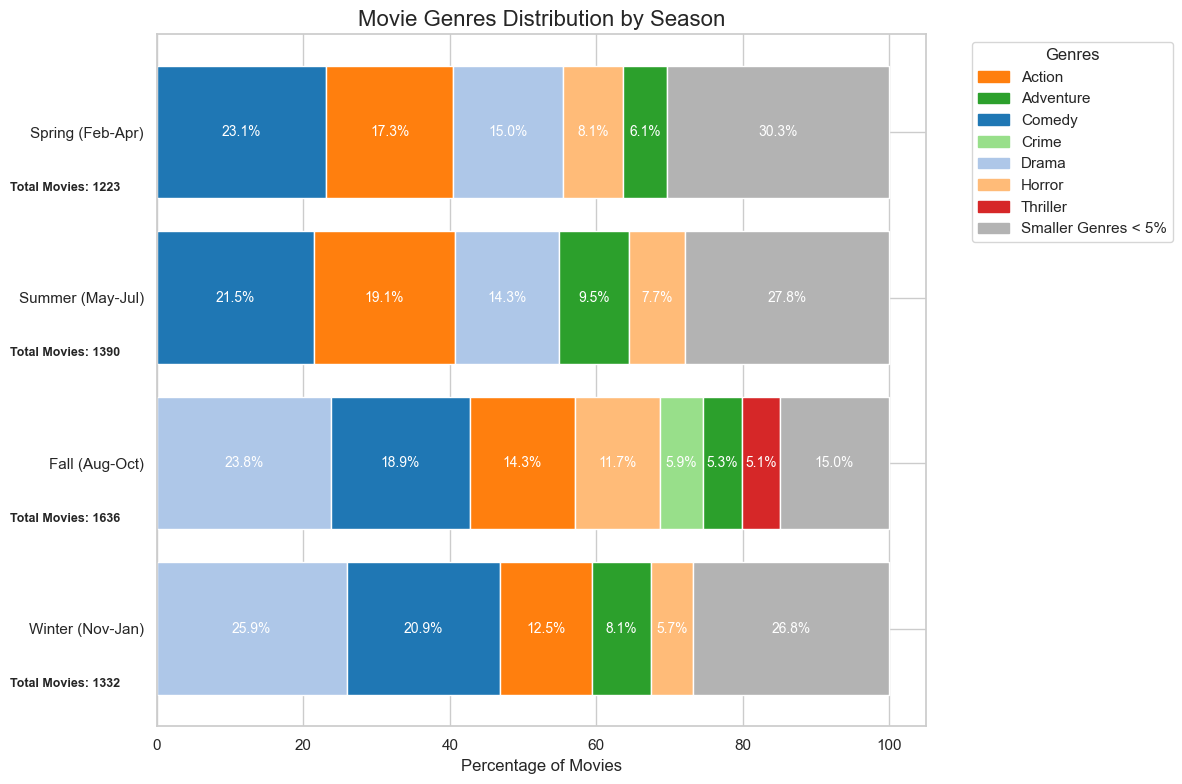

In [ ]:
# Ensure release_date is datetime
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Define seasons (Spring, Summer, Fall, Winter)
seasons = {
    'Spring (Feb-Apr)': [2,3,4],
    'Summer (May-Jul)': [5,6,7],
    'Fall (Aug-Oct)': [8,9,10],
    'Winter (Nov-Jan)': [11,12,1]
}

# Create a consistent color palette for all genres
all_genres = movies_cleaned['genre'].value_counts().index.tolist()
palette = sns.color_palette("tab20", n_colors=len(all_genres))
genre_colors = {genre: palette[i] for i, genre in enumerate(all_genres)}
genre_colors['Smaller Genres < 5%'] = (0.7, 0.7, 0.7)  # Gray for small genres

# Prepare data for horizontal stacked bar chart
season_labels = list(seasons.keys())  # Spring, Summer, Fall, Winter
season_data = []
season_totals = []

for season_name, months in seasons.items():
    season_movies = movies_cleaned[movies_cleaned['release_month'].isin(months)]
    genre_counts = season_movies['genre'].value_counts()
    total_movies = genre_counts.sum()
    season_totals.append(total_movies)
    
    # Separate genres < 5% into "Smaller Genres < 5%"
    small_genres = genre_counts[genre_counts / total_movies < 0.05]
    large_genres = genre_counts[genre_counts / total_movies >= 0.05]
    
    # Sort large genres descending
    final_counts = large_genres.sort_values(ascending=False)
    
    # Add small genres at the end
    if not small_genres.empty:
        final_counts['Smaller Genres < 5%'] = small_genres.sum()
    
    # Convert counts to percentages
    percentages = final_counts / final_counts.sum() * 100
    season_data.append(percentages)

# Reverse the order for plotting so top → bottom is Spring → Winter
season_labels_rev = season_labels[::-1]
season_data_rev = season_data[::-1]
season_totals_rev = season_totals[::-1]

# Create a DataFrame from the computed percentages
season_df = pd.DataFrame(season_data, index=season_labels).fillna(0)

# Round percentages for readability
season_df = season_df.round(2)

# Display the table
print("\n=== Movie Genre Distribution by Season (in %) ===")
print(season_df)

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# --- Prepare legend ---
# Collect all genres except 'Smaller Genres < 5%'
all_used_genres = set()
for season in season_data_rev:
    all_used_genres.update([g for g in season.index if g != 'Smaller Genres < 5%'])

# Sort alphabetically ascending
sorted_genres_for_legend = sorted(all_used_genres)

# Add Smaller Genres at the bottom
sorted_genres_for_legend.append('Smaller Genres < 5%')

# Create legend patches
legend_patches = [plt.Rectangle((0,0),1,1,color=genre_colors[genre]) for genre in sorted_genres_for_legend]

# --- Plot bars ---
for j, season in enumerate(season_data_rev):
    # Sort large genres descending
    sorted_genres = season.drop(labels=['Smaller Genres < 5%'], errors='ignore').sort_values(ascending=False)
    # Add small genre at the end
    if 'Smaller Genres < 5%' in season.index:
        sorted_genres['Smaller Genres < 5%'] = season['Smaller Genres < 5%']
    
    left = 0
    for genre in sorted_genres.index:
        val = sorted_genres[genre]
        bar = ax.barh(season_labels_rev[j], val, left=left, color=genre_colors.get(genre, (0.7,0.7,0.7)), edgecolor='white')
        if val > 0:
            ax.text(left + val/2, j, f'{val:.1f}%', va='center', ha='center', color='white', fontsize=10)
        left += val

# Adjust left margin for total movie counts
plt.subplots_adjust(left=0.25)

# Add total movie counts on the far left, slightly below each bar
y_offset = -0.3
for i, total in enumerate(season_totals_rev):
    ax.text(-5, i + y_offset, f'Total Movies: {total}', va='top', ha='right', fontsize=9, fontweight='bold')

ax.set_xlabel('Percentage of Movies')
ax.set_title('Movie Genres Distribution by Season', fontsize=16)
ax.legend(legend_patches, sorted_genres_for_legend, title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





genre             Action  Comedy  Adventure  Animation  Drama  \
Spring (Feb-Apr)   28.49   13.26      13.09       8.52   7.37   
Summer (May-Jul)   30.60   13.10      17.83       9.97   5.51   
Fall (Aug-Oct)     23.78   13.22       7.68       0.00  16.16   
Winter (Nov-Jan)   15.58   15.67      19.21       6.53  18.89   

genre             Science Fiction  Smaller Genres < 5%  Fantasy  Horror  \
Spring (Feb-Apr)             5.02                24.25     0.00    0.00   
Summer (May-Jul)             5.11                12.47     5.41    0.00   
Fall (Aug-Oct)               0.00                28.62     0.00   10.55   
Winter (Nov-Jan)             0.00                24.12     0.00    0.00   

genre             Total Revenue  
Spring (Feb-Apr)   1.152636e+11  
Summer (May-Jul)   2.169237e+11  
Fall (Aug-Oct)     1.088512e+11  
Winter (Nov-Jan)   1.585904e+11  


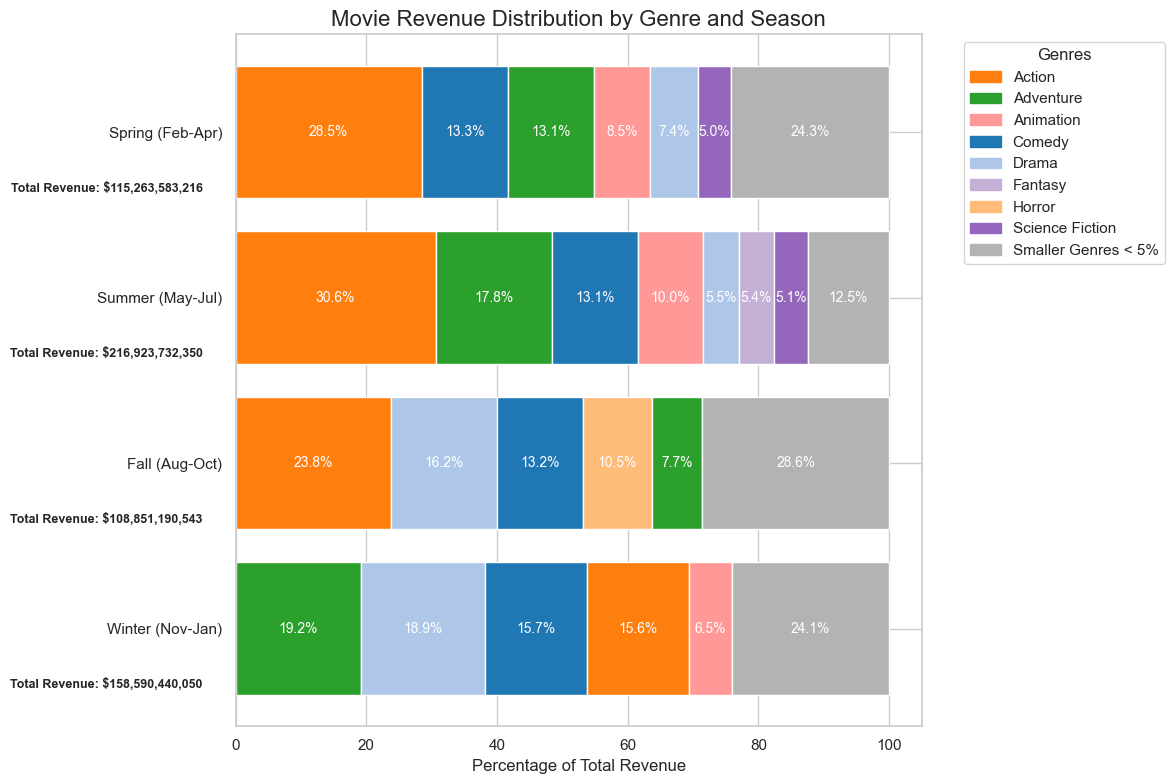

In [ ]:
# Ensure release_date is datetime
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Define seasons
seasons = {
    'Spring (Feb-Apr)': [2,3,4],
    'Summer (May-Jul)': [5,6,7],
    'Fall (Aug-Oct)': [8,9,10],
    'Winter (Nov-Jan)': [11,12,1]
}

# Create color palette for all genres
all_genres = movies_cleaned['genre'].value_counts().index.tolist()
palette = sns.color_palette("tab20", n_colors=len(all_genres))
genre_colors = {genre: palette[i] for i, genre in enumerate(all_genres)}
genre_colors['Smaller Genres < 5%'] = (0.7, 0.7, 0.7)

# Prepare data for horizontal stacked bar chart (Revenue)
season_labels = list(seasons.keys())
season_data = []
season_totals = []

for season_name, months in seasons.items():
    season_movies = movies_cleaned[movies_cleaned['release_month'].isin(months)]
    genre_revenue = season_movies.groupby('genre')['revenue'].sum()
    total_revenue = genre_revenue.sum()
    season_totals.append(total_revenue)

    if total_revenue == 0:
        percentages = pd.Series(dtype=float)
    else:
        small_genres = genre_revenue[genre_revenue / total_revenue < 0.05]
        large_genres = genre_revenue[genre_revenue / total_revenue >= 0.05]

        final_revenue = large_genres.sort_values(ascending=False)
        if not small_genres.empty:
            final_revenue['Smaller Genres < 5%'] = small_genres.sum()

        percentages = final_revenue / final_revenue.sum() * 100

    season_data.append(percentages)

# Reverse for top → bottom plotting: Spring → Winter
season_labels_rev = season_labels[::-1]
season_data_rev = season_data[::-1]
season_totals_rev = season_totals[::-1]

# Combine all percentages into a single DataFrame
season_df = pd.DataFrame(season_data, index=season_labels)

# Add total revenue per season as a separate column
season_df['Total Revenue'] = season_totals

# Display the final table
print(season_df.fillna(0).round(2))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

for j, season in enumerate(season_data_rev):
    sorted_genres = season.drop(labels=['Smaller Genres < 5%'], errors='ignore').sort_values(ascending=False)
    if 'Smaller Genres < 5%' in season.index:
        sorted_genres['Smaller Genres < 5%'] = season['Smaller Genres < 5%']

    left = 0
    for genre in sorted_genres.index:
        val = sorted_genres[genre]
        bar = ax.barh(season_labels_rev[j], val, left=left, color=genre_colors.get(genre, (0.7,0.7,0.7)), edgecolor='white')
        if val > 0:
            ax.text(left + val/2, j, f'{val:.1f}%', va='center', ha='center', color='white', fontsize=10)
        left += val

# Adjust left margin for revenue totals
plt.subplots_adjust(left=0.25)

# Add total revenue below each season on the far left
y_offset = -0.3
for i, total in enumerate(season_totals_rev):
    ax.text(-5, i + y_offset, f'Total Revenue: ${total:,.0f}', va='top', ha='right', fontsize=9, fontweight='bold')

# --- Alphabetically ascending legend, Smaller Genres last ---
# Collect all genres except 'Smaller Genres < 5%'
all_used_genres = set()
for season in season_data_rev:
    all_used_genres.update([g for g in season.index if g != 'Smaller Genres < 5%'])

# Sort alphabetically ascending and add Smaller Genres at the bottom
sorted_genres_for_legend = sorted(all_used_genres)
sorted_genres_for_legend.append('Smaller Genres < 5%')

# Create legend patches
legend_patches = [plt.Rectangle((0,0),1,1,color=genre_colors[genre]) for genre in sorted_genres_for_legend]

ax.set_xlabel('Percentage of Total Revenue')
ax.set_title('Movie Revenue Distribution by Genre and Season', fontsize=16)
ax.legend(legend_patches, sorted_genres_for_legend, title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



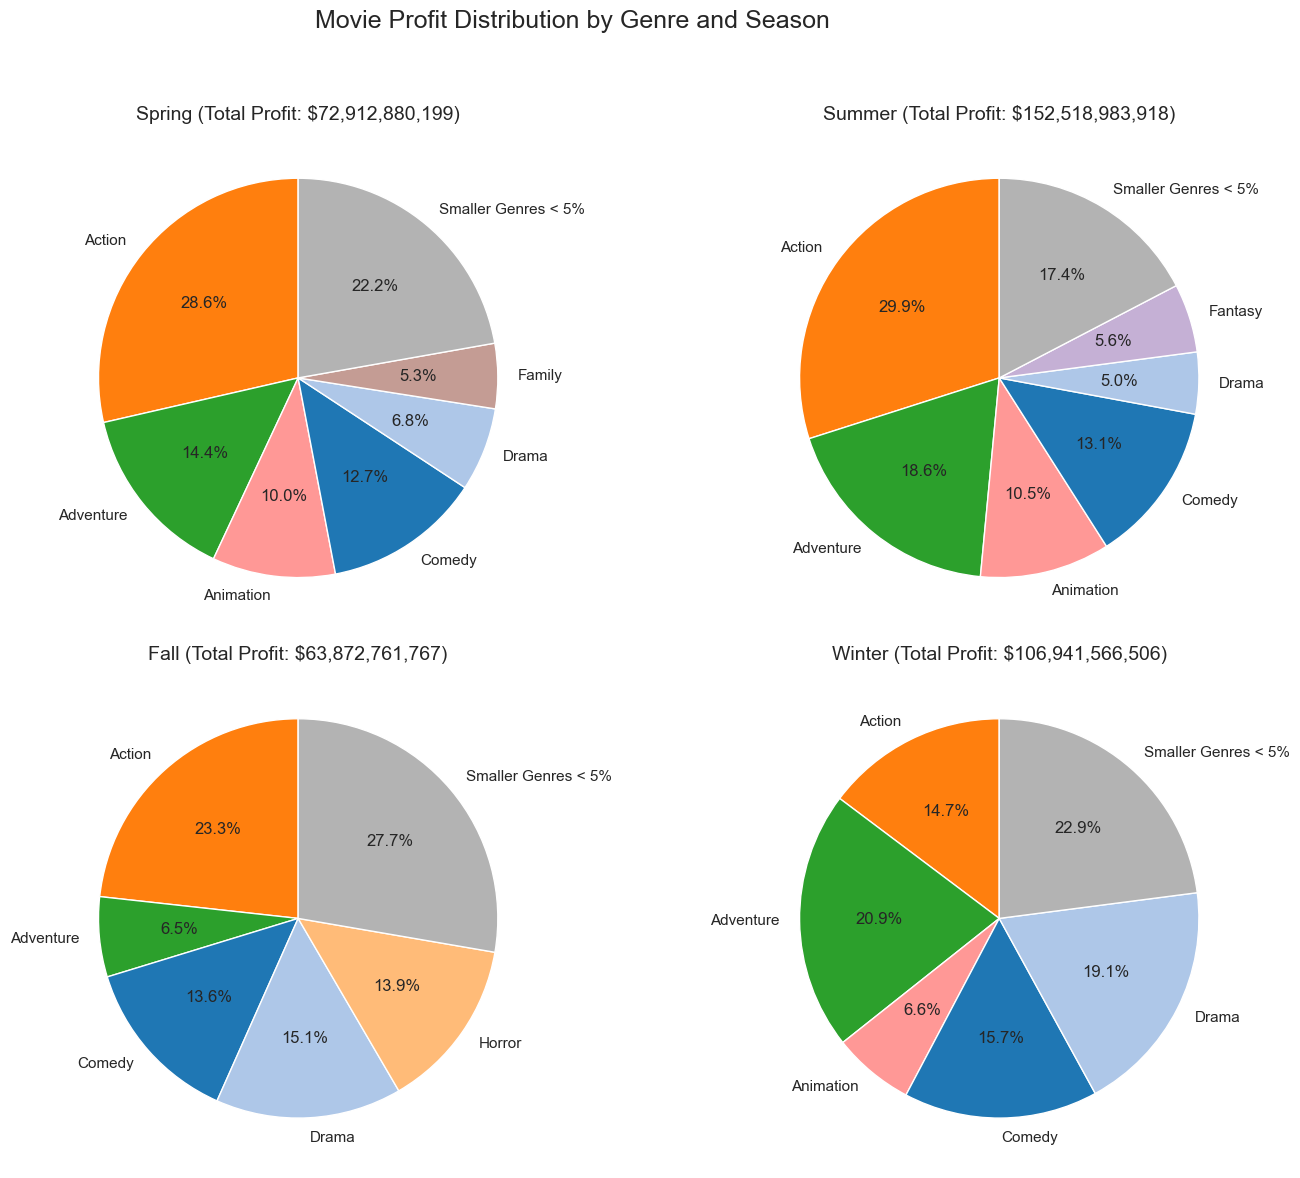

In [ ]:
# Ensure release_date is datetime
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Define seasons
seasons = {
    'Feb-Apr': [2,3,4],
    'May-Jul': [5,6,7],
    'Aug-Oct': [8,9,10],
    'Nov-Jan': [11,12,1]
}

# Identify all major genres across all seasons (≥5% in any season)
major_genres_set = set()
for months in seasons.values():
    season_movies = movies_cleaned[movies_cleaned['release_month'].isin(months)]
    roi_by_genre = season_movies.groupby('genre')['return_on_investment'].sum()
    total_roi = roi_by_genre.sum()
    major_genres_set.update(roi_by_genre[roi_by_genre / total_roi >= 0.05].index)

major_genres = sorted(list(major_genres_set))  # for consistent ordering

# Assign colors
palette = sns.color_palette("tab20", n_colors=len(major_genres))
genre_colors = {genre: palette[i] for i, genre in enumerate(major_genres)}
genre_colors['Smaller Genres < 5%'] = (0.7, 0.7, 0.7)  # gray for smaller genres

# Prepare subplots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure release_date is datetime
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Define seasons
seasons = {
    'Spring': [2,3,4],
    'Summer': [5,6,7],
    'Fall': [8,9,10],
    'Winter': [11,12,1]
}

# Use the same color mapping as your previous plot
all_genres = movies_cleaned['genre'].value_counts().index.tolist()
palette = sns.color_palette("tab20", n_colors=len(all_genres))
genre_colors = {genre: palette[i] for i, genre in enumerate(all_genres)}
genre_colors['Smaller Genres < 5%'] = (0.7, 0.7, 0.7)  # Gray for smaller genres

# Prepare subplots
fig, axs = plt.subplots(2,2, figsize=(14,12))
axs = axs.flatten()

# Generate pie charts by profit
for i, (season_name, months) in enumerate(seasons.items()):
    season_movies = movies_cleaned[movies_cleaned['release_month'].isin(months)]
    
    # Aggregate profit by genre
    profit_by_genre = season_movies.groupby('genre')['profit'].sum()
    total_profit = profit_by_genre.sum()
    
    # Separate small genres (<5% of total profit)
    small_genres = profit_by_genre[profit_by_genre / total_profit < 0.05]
    large_genres = profit_by_genre[profit_by_genre / total_profit >= 0.05]
    
    # Combine
    final_profit = large_genres.copy()
    if not small_genres.empty:
        final_profit['Smaller Genres < 5%'] = small_genres.sum()
    
    # Assign colors
    colors = [genre_colors[genre] for genre in final_profit.index]
    
    # Plot pie chart with total profit in the title
    axs[i].pie(final_profit, labels=final_profit.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'{season_name} (Total Profit: ${total_profit:,.0f})', fontsize=14)

# Main title centered between columns
fig.suptitle('Movie Profit Distribution by Genre and Season', fontsize=18, x=0.44)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()





Movie Profit Distribution by Genre and Season (% of Total Profit per Season):

genre             Action  Adventure  Comedy  Animation  Drama  Family  Smaller Genres < 5%  Fantasy  Horror  Total Profit
Spring (Feb-Apr)   28.59      14.44   12.75       9.96   6.78    5.27                22.21     0.00    0.00  7.291288e+10
Summer (May-Jul)   29.93      18.57   13.05      10.53   5.00    0.00                17.35     5.56    0.00  1.525190e+11
Fall (Aug-Oct)     23.26       6.48   13.61       0.00  15.07    0.00                27.71     0.00   13.87  6.387276e+10
Winter (Nov-Jan)   14.74      20.93   15.72       6.59  19.07    0.00                22.94     0.00    0.00  1.069416e+11


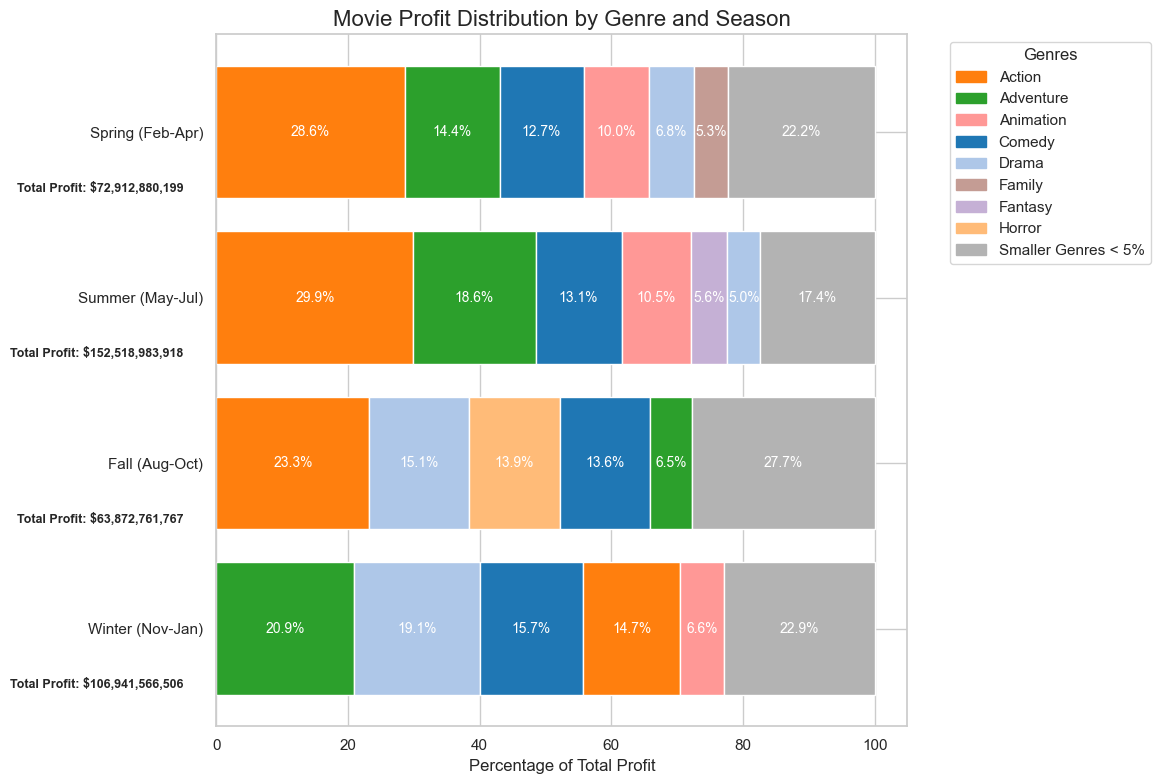

In [ ]:
# Ensure release_date is datetime
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Define seasons
seasons = {
    'Spring (Feb-Apr)': [2,3,4],
    'Summer (May-Jul)': [5,6,7],
    'Fall (Aug-Oct)': [8,9,10],
    'Winter (Nov-Jan)': [11,12,1]
}

# Use same color mapping as previous plots
all_genres = movies_cleaned['genre'].value_counts().index.tolist()
palette = sns.color_palette("tab20", n_colors=len(all_genres))
genre_colors = {genre: palette[i] for i, genre in enumerate(all_genres)}
genre_colors['Smaller Genres < 5%'] = (0.7, 0.7, 0.7)

# Prepare data for horizontal stacked bar chart
season_labels = list(seasons.keys())
season_data = []
season_totals = []

for season_name, months in seasons.items():
    season_movies = movies_cleaned[movies_cleaned['release_month'].isin(months)]
    profit_by_genre = season_movies.groupby('genre')['profit'].sum()
    total_profit = profit_by_genre.sum()
    season_totals.append(total_profit)

    if total_profit == 0:
        percentages = pd.Series(dtype=float)
    else:
        small_genres = profit_by_genre[profit_by_genre / total_profit < 0.05]
        large_genres = profit_by_genre[profit_by_genre / total_profit >= 0.05]

        final_profit = large_genres.sort_values(ascending=False)
        if not small_genres.empty:
            final_profit['Smaller Genres < 5%'] = small_genres.sum()

        percentages = final_profit / final_profit.sum() * 100

    season_data.append(percentages)

# Reverse for top → bottom plotting: Spring → Winter
season_labels_rev = season_labels[::-1]
season_data_rev = season_data[::-1]
season_totals_rev = season_totals[::-1]

# Combine data into a DataFrame for display
season_df = pd.DataFrame(season_data, index=season_labels)

# Add total profit per season
season_df['Total Profit'] = season_totals

# Print clean, rounded table
print("\nMovie Profit Distribution by Genre and Season (% of Total Profit per Season):\n")
print(season_df.fillna(0).round(2).to_string())

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

for j, season in enumerate(season_data_rev):
    sorted_genres = season.drop(labels=['Smaller Genres < 5%'], errors='ignore').sort_values(ascending=False)
    if 'Smaller Genres < 5%' in season.index:
        sorted_genres['Smaller Genres < 5%'] = season['Smaller Genres < 5%']

    left = 0
    for genre in sorted_genres.index:
        val = sorted_genres[genre]
        bar = ax.barh(season_labels_rev[j], val, left=left, color=genre_colors.get(genre, (0.7,0.7,0.7)), edgecolor='white')
        if val > 0:
            ax.text(left + val/2, j, f'{val:.1f}%', va='center', ha='center', color='white', fontsize=10)
        left += val

# Add total profit below each season on the far left
y_offset = -0.3
for i, total in enumerate(season_totals_rev):
    ax.text(-5, i + y_offset, f'Total Profit: ${total:,.0f}', va='top', ha='right', fontsize=9, fontweight='bold')

# Alphabetically ascending legend, Smaller Genres last
all_used_genres = set()
for season in season_data_rev:
    all_used_genres.update([g for g in season.index if g != 'Smaller Genres < 5%'])

sorted_genres_for_legend = sorted(all_used_genres)
sorted_genres_for_legend.append('Smaller Genres < 5%')

legend_patches = [plt.Rectangle((0,0),1,1,color=genre_colors[genre]) for genre in sorted_genres_for_legend]

ax.set_xlabel('Percentage of Total Profit')
ax.set_title('Movie Profit Distribution by Genre and Season', fontsize=16)
ax.legend(legend_patches, sorted_genres_for_legend, title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





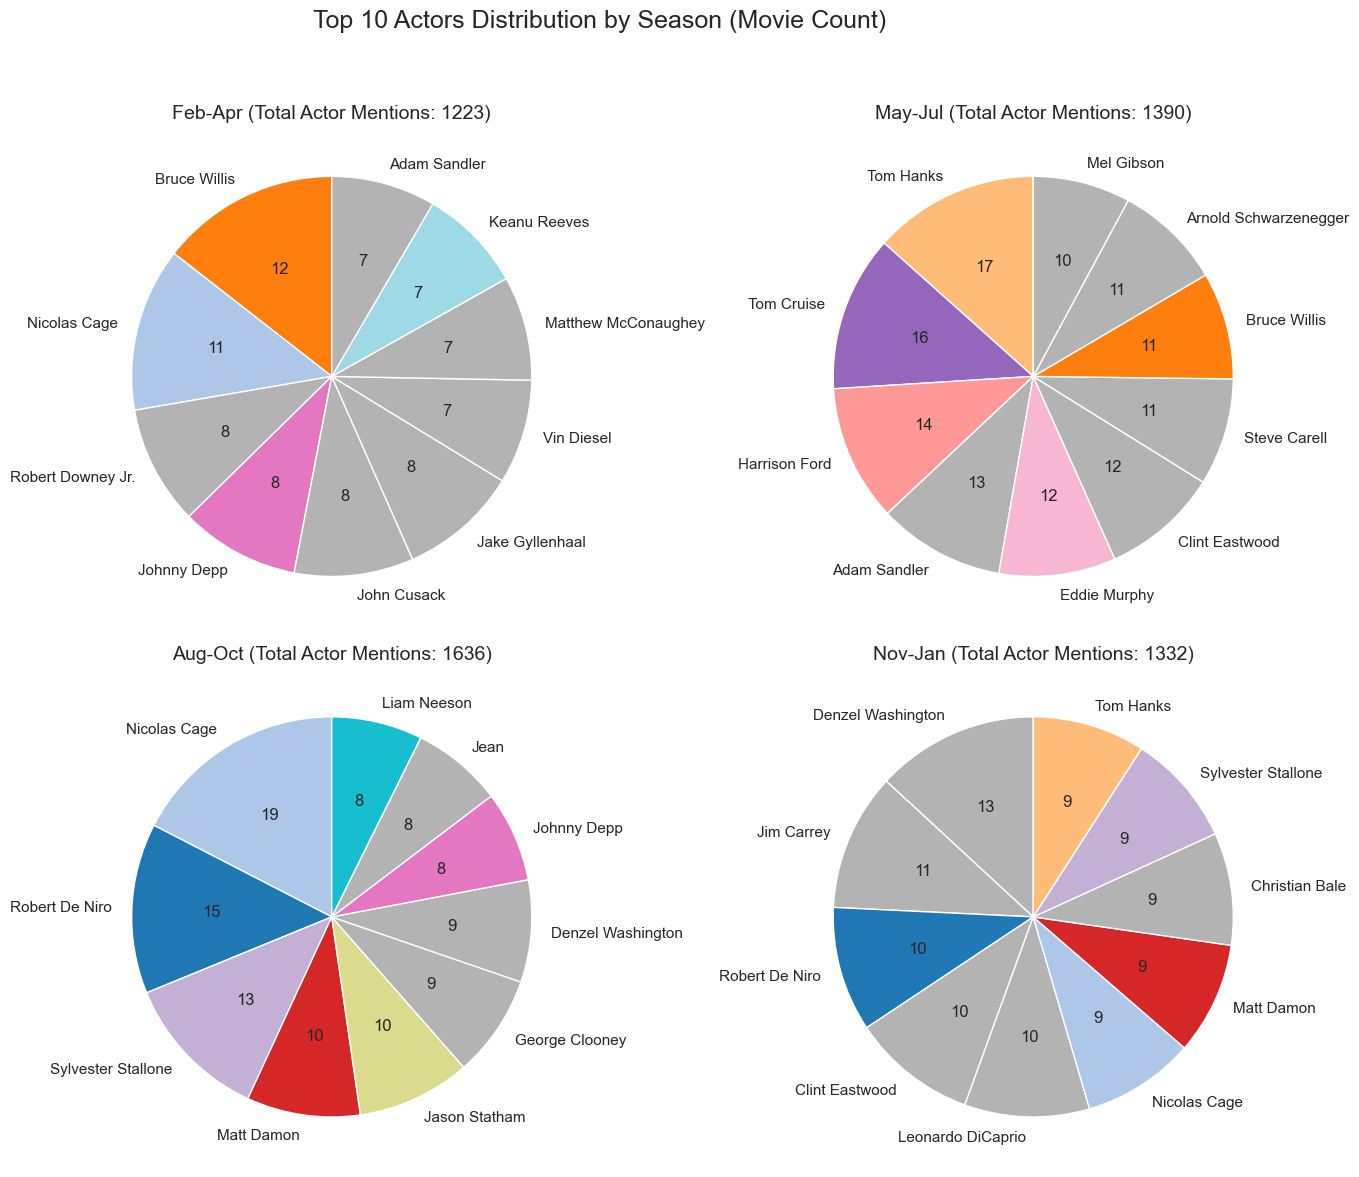

In [ ]:
# Melt actors into long format
actors_long = movies_cleaned.melt(
    id_vars=[],  # no numeric columns needed for count
    value_vars=['actor_1','actor_2','actor_3','actor_4'],
    var_name='actor_position',
    value_name='actor'
)

# Remove 'NA'
actors_long = actors_long[actors_long['actor'] != 'NA']

# Ensure release_date is datetime and get month
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned = movies_cleaned.dropna(subset=['release_date'])
movies_cleaned['release_month'] = movies_cleaned['release_date'].dt.month

# Merge release_month back into actors_long
actors_long = actors_long.merge(
    movies_cleaned[['release_date','release_month']],
    left_index=True,
    right_index=True,
    how='left'
)

# Define seasons
seasons = {
    'Feb-Apr': [2,3,4],
    'May-Jul': [5,6,7],
    'Aug-Oct': [8,9,10],
    'Nov-Jan': [11,12,1]
}

# Get top actors overall for consistent colors
top_actors_overall = actors_long['actor'].value_counts().head(20).index.tolist()
palette = sns.color_palette("tab20", n_colors=len(top_actors_overall))
actor_colors = {actor: palette[i] for i, actor in enumerate(top_actors_overall)}

# Function to show movie counts on pie slices
def autopct_count(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct*total/100.0))
        return str(count)
    return my_autopct

# Prepare subplots
fig, axs = plt.subplots(2,2, figsize=(14,12))
axs = axs.flatten()

# Generate pie charts for each season
for i, (season_name, months) in enumerate(seasons.items()):
    # Filter actors in this season
    season_actors = actors_long[actors_long['release_month'].isin(months)]
    
    # Count actors
    actor_counts = season_actors['actor'].value_counts()
    total_actors = actor_counts.sum()
    
    # Take top 10 actors only
    top_actors = actor_counts.head(10)
    
    # Assign colors (if actor not in top_actors_overall, assign gray)
    colors = [actor_colors.get(actor, (0.7,0.7,0.7)) for actor in top_actors.index]
    
    # Plot pie chart with movie counts
    axs[i].pie(top_actors, labels=top_actors.index, autopct=autopct_count(top_actors), startangle=90, colors=colors)
    axs[i].set_title(f'{season_name} (Total Actor Mentions: {total_actors})', fontsize=14)

# Main title centered
fig.suptitle('Top 10 Actors Distribution by Season (Movie Count)', fontsize=18, x=0.44)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



